We see that our dataset is mad of $n=146$ and $p=13$. These are its main features.

Let's also plot the histogram of Price  in order to check normality and the boxplot, otherwise let's apply a log transformation.
It easy to see that is better consider a log-tranformation. So I will refer to price variable as log(price) in the following analysis.

[1] "X"                "best.lambda"      "cv.lasso"         "cv.ridge"        
 [5] "felicita"         "id.zero"          "m.forward"        "m.gam"           
 [9] "m.gam2"           "m.gam3"           "m.glm"            "m.lasso"         
[13] "m.lasso.min"      "m.ridge"          "m.ridge.min"      "model.mydata"    
[17] "model.mydata2"    "model.mydata3"    "mse"              "mydata"          
[21] "nonzero"          "p.mglm"           "prediction.lasso" "prediction.ridge"
[25] "rmse"             "x"                "x1.cv"            "x2.cv"           
[29] "y"

[1] "salute.indice" "salute.spese"  "istruzione"    "vita"         
 [5] "reddito.distr" "equatore"      "popden"        "spese.pagate" 
 [9] "pilc"          "banca"         "democrazia"    "oecd"         
[13] "felice"

[1] 146

[1] 13

felice,salute.spese,equatore,pilc
2.302585,28.28851,FALSE,884.0158
2.397895,47.17409,TRUE,1310.3910
2.564949,63.53210,FALSE,1815.2030


     felice       salute.spese      equatore       pilc        
 Min.   :0.000   Min.   :  11.06   FALSE:81   Min.   :  521.5  
 1st Qu.:2.303   1st Qu.:  57.19   TRUE :65   1st Qu.: 1609.4  
 Median :3.045   Median : 155.22              Median : 3623.1  
 Mean   :2.935   Mean   : 425.00              Mean   : 6945.8  
 3rd Qu.:3.689   3rd Qu.: 503.84              3rd Qu.: 8554.3  
 Max.   :4.407   Max.   :3326.02              Max.   :30264.3  

[1] 0

integer(0)

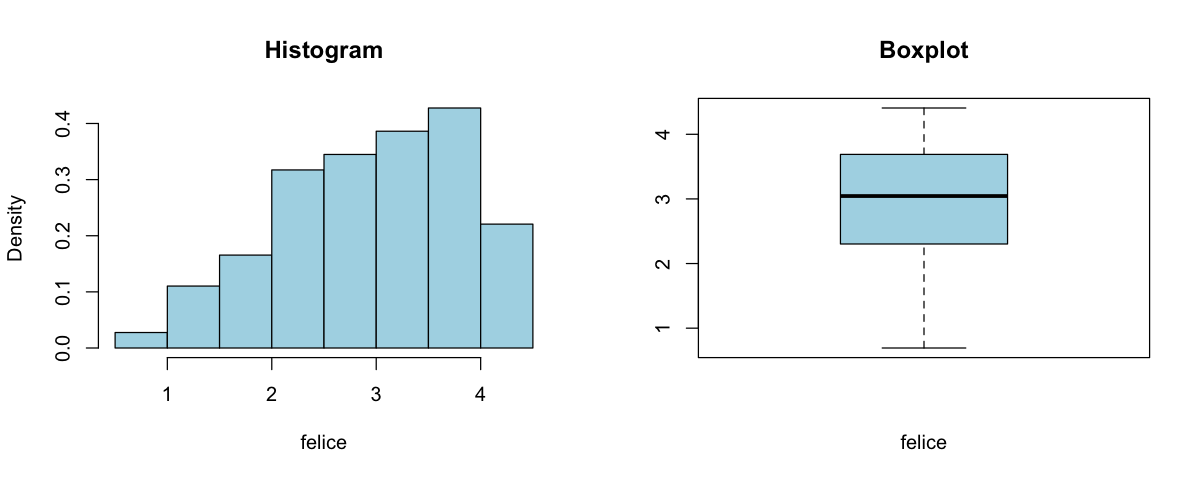

felice,salute.spese,equatore,pilc
0.8340324,28.28851,FALSE,884.0158
0.8745914,47.17409,TRUE,1310.3910
0.9419387,63.53210,FALSE,1815.2030


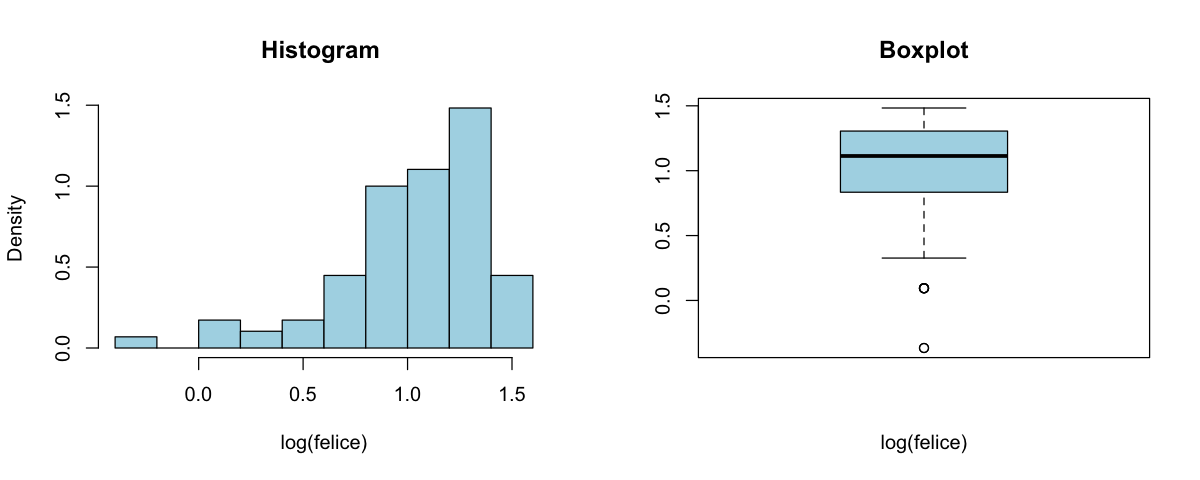

In [170]:
## load the data

load("Felice.RData")
ls()
names(felicita)
mydata<-felicita
nrow(mydata)
ncol(mydata)

mydata <- mydata[, c('felice', 'salute.spese', 'equatore',  'pilc')]
mydata[1:3,]

summary(mydata)
#check NA values
sum(is.na(mydata))
#clean from NA
#mydata <- na.omit(mydata)


#to remove infinite
which(mydata$felice=="-Inf")
mydata<-mydata[-129,]
#check that they are factors otherwise make it

mydata$equatore<-as.factor(mydata$equatore)
## SE HAI VARIABILI QUALITATIVE CON DEI LIVELLI PLOTTA LA TABELLA 

par(mfrow=c(1,2))
options(repr.plot.width = 10, repr.plot.height = 4)
hist(mydata$felice, prob=TRUE, xlab='felice', main='Histogram',col="lightblue")
boxplot(mydata$felice, xlab='felice', main='Boxplot',col="lightblue" )
hist(log(mydata$felice), prob=TRUE, xlab='log(felice)', main='Histogram ',col="lightblue")
boxplot(log(mydata$felice), xlab='log(felice)', main='Boxplot',col="lightblue" )

mydata$felice<-log((mydata$felice))

mydata[1:3,]

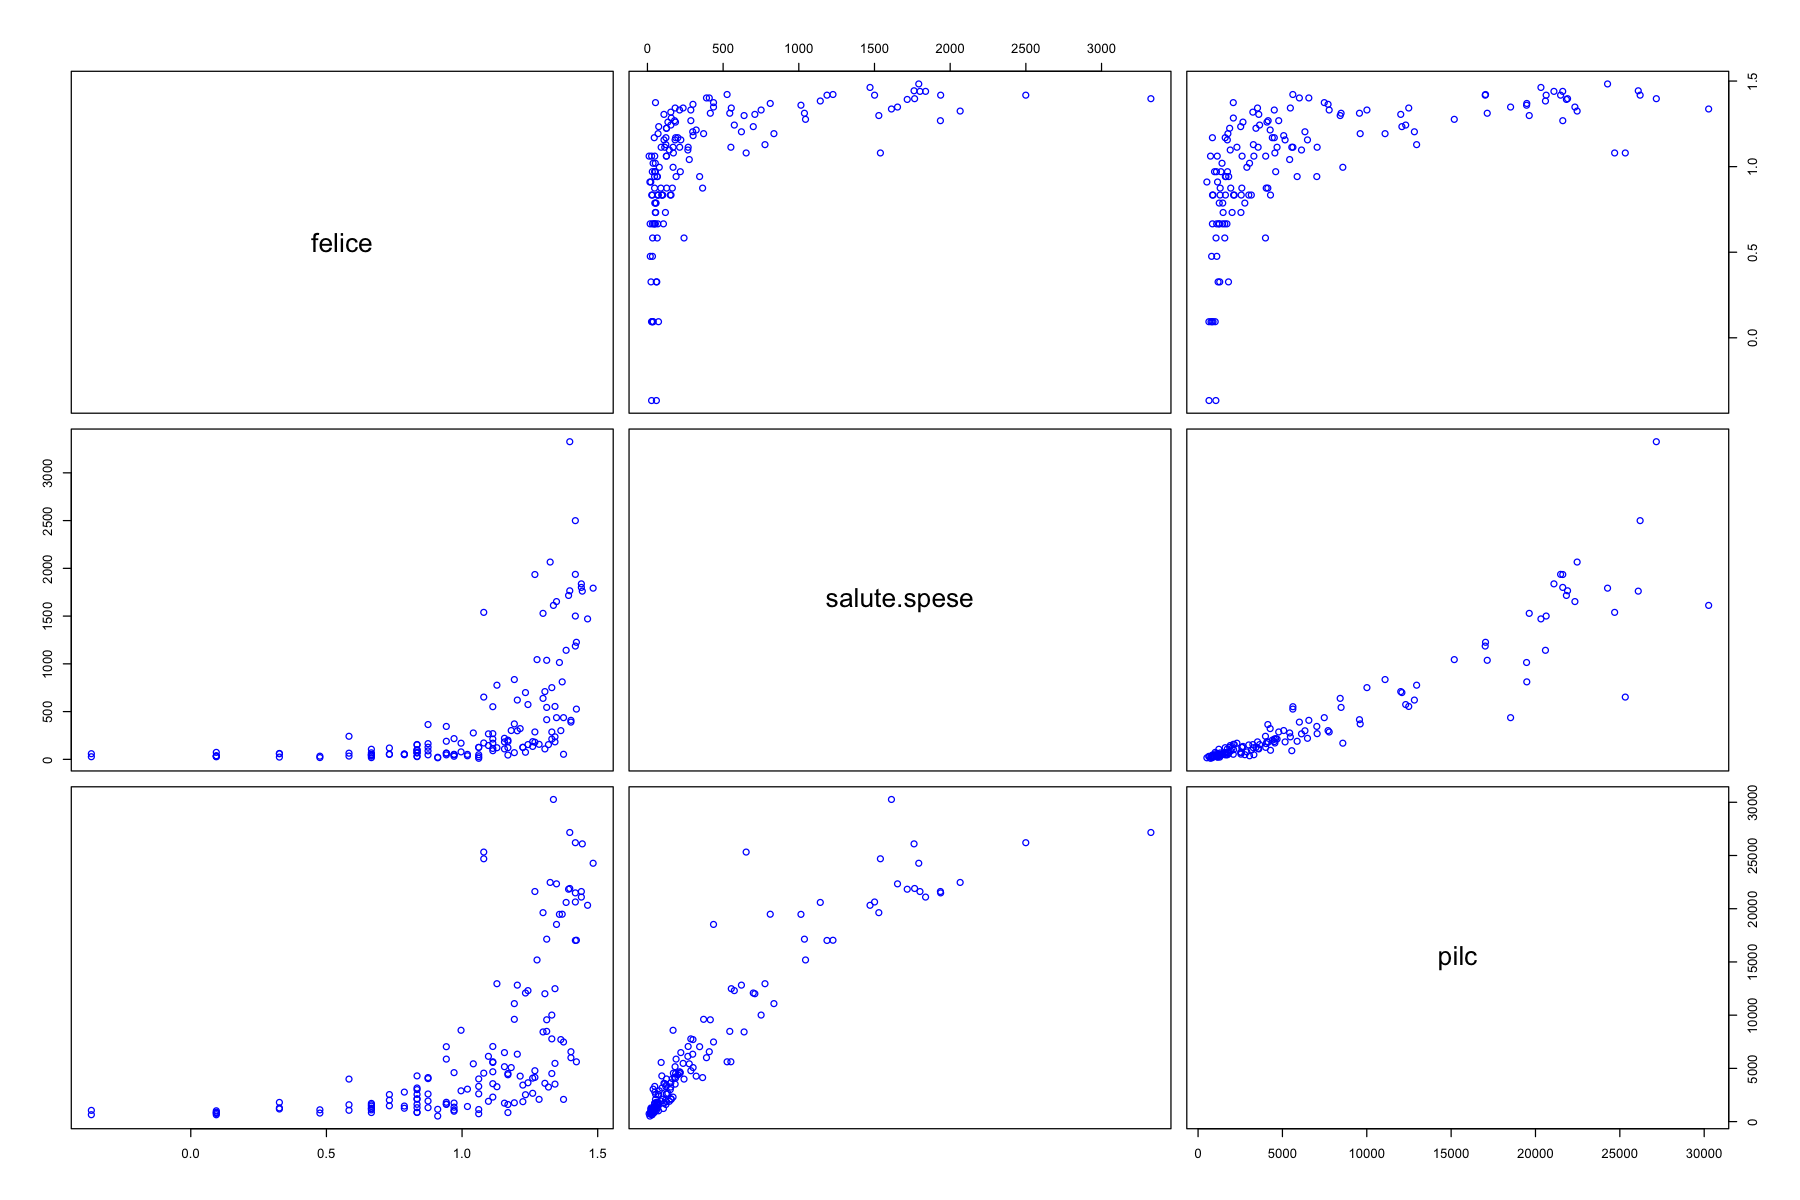

In [171]:
options(repr.plot.width = 15, repr.plot.height = 10)
pairs(mydata[,c(1,2,4)],col="blue")

 Let also check the relationship between Y and the covariates X. From this plot we can see a kind of polynomial relationship between felice and salute.spesa and felice and pilc.
 
 
Regardign the interections between variables we see from the following plots that there is some overlapping (in the three scatter plots) but we can somehow distinguish the different classes, meaning that maybe there could be interactions.
As concern the boxplots, in the first one from left we se a clear difference between the two medians and also the width is different, meaning that people at equator are less happy. For the second one we can perform the same consideration saying that salute.spese is higher for non-equator while in the third people non equator are higher pilc with higher widht. We can also see some outliers in the three boxplots.

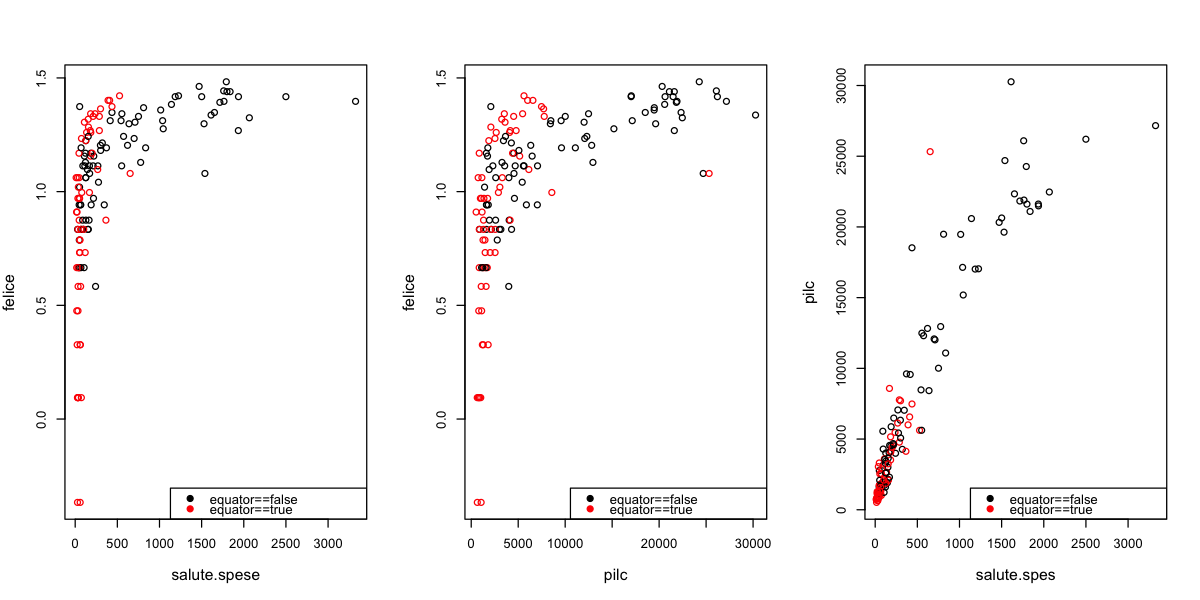

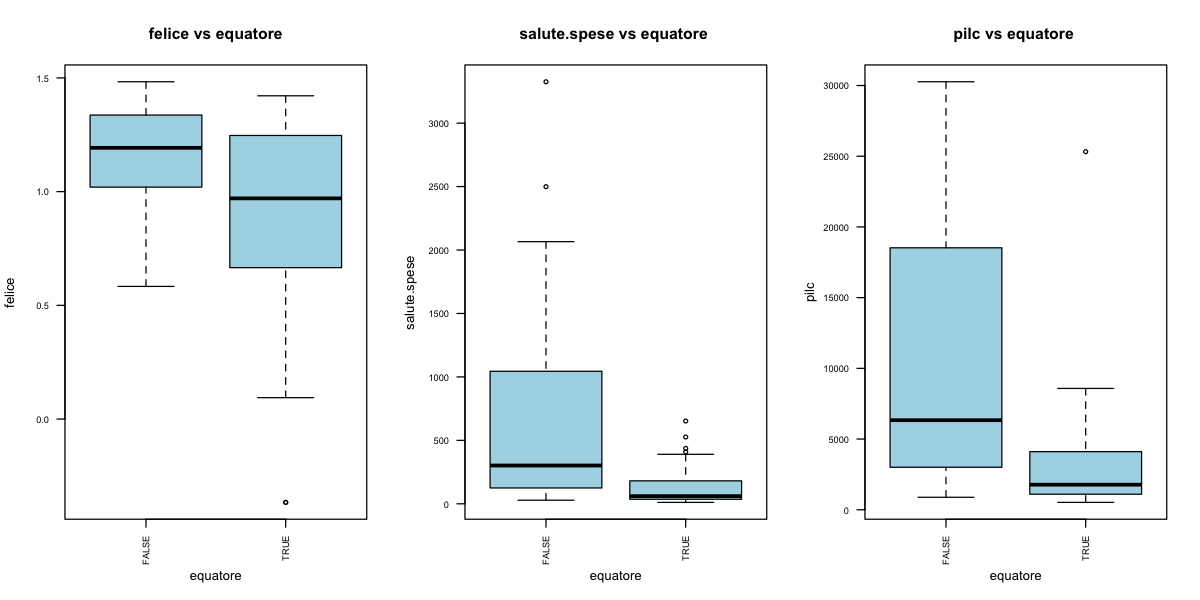

In [79]:
## plot con tutte le variabili in funzione di y per vedere eventuale relazione

##plot per verificare eventuali interazioni, nel caso di variabili di tipo YES/NO o livelli o classe insomme
par(mfrow=c(1,3))
options(repr.plot.width = 10, repr.plot.height = 5)

plot(mydata$salute.spese, mydata$felice, cex.lab=1.2, xlab='salute.spese', ylab='felice',col=mydata$equatore)
legend('bottomright', col=c(1,2), pch=c(19,19),
        legend=c('equator==false','equator==true'))


plot(mydata$pilc, mydata$felice, cex.lab=1.2, xlab='pilc', ylab='felice',col=mydata$equatore)
legend('bottomright', col=c(1,2), pch=c(19,19),
        legend=c('equator==false','equator==true'))


plot(mydata$salute.spese, mydata$pilc, cex.lab=1.2, xlab='salute.spes', ylab='pilc',col=mydata$equatore)
legend('bottomright', col=c(1,2), pch=c(19,19),
        legend=c('equator==false','equator==true'))



par(mfrow=c(1,3))
## plot boxplot per eventuali iterazioni (basati pero sempre su quello sopra)
boxplot(mydata$felice~ mydata$equatore, las=2, cex.axis=0.7,col="lightblue",xlab="equatore",
ylab='felice', main="felice vs equatore")
boxplot(mydata$salute.spese~ mydata$equatore, las=2, cex.axis=0.7,col="lightblue",xlab="equatore",
ylab='salute.spese', main='salute.spese vs equatore ')
boxplot(mydata$pilc~ mydata$equatore, las=2, cex.axis=0.7,col="lightblue",xlab="equatore",
ylab='pilc', main='pilc vs equatore ')
#boxplot(mydata$x1~ mydata$x2-livello, las=2, cex.axis=0.7,col="lighblue",
#xlab='', main=' x1 vs x2-livello ')
#boxplot(mydata$x2~ mydata$x1-livello, las=2, cex.axis=0.7,col="lighblue",
#xlab='', main='x2 vs x1-livello ')
#boxplot(mydata$x2~ mydata$x2-livello, las=2, cex.axis=0.7,col="lighblue",
#xlab='', main=' x2 vs x2-livello ')
#boxplot(mydata$x3~ mydata$x1-livello, las=2, cex.axis=0.7,col="lighblue",
#xlab='', main='x2 vs x1-livello ')
#boxplot(mydata$x3~ mydata$x2-livello, las=2, cex.axis=0.7,col="lighblue",
#xlab='', main=' x3 vs x2-livello ')

#par(mfrow=c(1,2))
## plot moasic plot
#mosaicplot(table(mydata$prefer,mydata$stories), las=2, cex.axis=0.7,col="lightblue",
#xlab='', main='prefer vs stories ')
#mosaicplot(table( mydata$aircon, mydata$prefer), las=2, cex.axis=0.7,col="lightblue",
#xlab='', main='aircon vs prefer ')
#mosaicplot(table(mydata$x1, mydata$x1-livello), main='x1 vs x1-livello',col="lightblue")
#mosaicplot(table(mydata$x1, mydata$x2-livello), main='x1 vs x2-livello',col="lightblue")
#mosaicplot(table(mydata$x1-livello, mydata$x2-livello), main='x1-livello vs x2-livello',col="lightblue")

After this preliminary analysis we can apply a linear regression. Let's start with a model with all variables and interactions and then perform model selection base ond $P-value$.

So I started with a model including also the interactions between the covariates then the final model I have obtained is the following output, including the polynimial terms.
In the table below the 95% CI for coefficients is reported.

In [88]:
model.mydata <- lm(felice~salute.spese*pilc + salute.spese*equatore + equatore*pilc , data=mydata)

summary(model.mydata)

## rimuovere interazione non significativa (P-value più alto), ad esempio quella tra x1 e x4. 
model.mydata2 <- update(model.mydata, .~.-pilc:equatore)
summary(model.mydata2)
confint(model.mydata2)


Call:
lm(formula = felice ~ salute.spese * pilc + salute.spese * equatore + 
    equatore * pilc, data = mydata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11667 -0.10123  0.02232  0.13498  0.45974 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                8.697e-01  5.855e-02  14.853  < 2e-16 ***
salute.spese               5.334e-04  2.432e-04   2.193  0.02996 *  
pilc                       1.845e-05  9.721e-06   1.898  0.05978 .  
equatoreTRUE              -2.351e-01  7.128e-02  -3.299  0.00124 ** 
salute.spese:pilc         -2.091e-08  8.109e-09  -2.579  0.01096 *  
salute.spese:equatoreTRUE  1.404e-03  5.099e-04   2.754  0.00669 ** 
pilc:equatoreTRUE         -1.627e-05  2.058e-05  -0.791  0.43039    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2653 on 138 degrees of freedom
Multiple R-squared:  0.4817,	Adjusted R-squared:  0.4592 
F-statistic: 21.38 on 6 and 138


Call:
lm(formula = felice ~ salute.spese + pilc + equatore + salute.spese:pilc + 
    salute.spese:equatore, data = mydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1101 -0.1072  0.0185  0.1375  0.4518 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                8.724e-01  5.838e-02  14.943  < 2e-16 ***
salute.spese               6.224e-04  2.153e-04   2.891 0.004464 ** 
pilc                       1.462e-05  8.413e-06   1.737 0.084582 .  
equatoreTRUE              -2.428e-01  7.051e-02  -3.444 0.000757 ***
salute.spese:pilc         -2.279e-08  7.745e-09  -2.942 0.003818 ** 
salute.spese:equatoreTRUE  1.070e-03  2.845e-04   3.760 0.000249 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2649 on 139 degrees of freedom
Multiple R-squared:  0.4794,	Adjusted R-squared:  0.4606 
F-statistic:  25.6 on 5 and 139 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),7.569372e-01,9.877835e-01
salute.spese,1.966668e-04,1.048129e-03
pilc,-2.019738e-06,3.124996e-05
equatoreTRUE,-3.822461e-01,-1.034403e-01
salute.spese:pilc,-3.810130e-08,-7.475056e-09
salute.spese:equatoreTRUE,5.071816e-04,1.632011e-03


In [89]:
model.mydata3<-update(model.mydata2, .~.+I(salute.spese^2)+I(pilc^2))
summary(model.mydata3)


Call:
lm(formula = felice ~ salute.spese + pilc + equatore + I(salute.spese^2) + 
    I(pilc^2) + salute.spese:pilc + salute.spese:equatore, data = mydata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04748 -0.09099  0.01432  0.14627  0.51803 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                7.978e-01  6.173e-02  12.925  < 2e-16 ***
salute.spese              -7.725e-04  4.133e-04  -1.869 0.063750 .  
pilc                       1.070e-04  2.546e-05   4.200 4.77e-05 ***
equatoreTRUE              -2.639e-01  6.947e-02  -3.799 0.000217 ***
I(salute.spese^2)         -3.099e-07  1.480e-07  -2.094 0.038146 *  
I(pilc^2)                 -5.651e-09  1.502e-09  -3.762 0.000249 ***
salute.spese:pilc          8.604e-08  3.443e-08   2.499 0.013633 *  
salute.spese:equatoreTRUE  1.387e-03  3.017e-04   4.596 9.68e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2532 on 

In [90]:
anova(model.mydata2,model.mydata3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
139,9.757371,NA,NA,NA,NA
137,8.783222,2,0.9741484,7.597345,0.0007430075


From anova we see that we keep model with polynomial terms.
Now we can judge also our model considering the residuals. 
The graph of residuals indicates that the model does  have an acceptablr fit. In fact, the first graph (scatter plot of the residuals) doesn't show a net deterministic pattern e. In addition, the mean of the residuals does  appear to be 0 and the variance of the residuals does  appear to be constant, as it should be based on the assumptions that the regression model places on the ε errors. Furthermore, the normality of the residuals is  satisfied  as highlighted in the second graph: the empirical quantiles, in fact, don't deviate from the theoretical quantiles of a standard normal (except for one of the tails).
To complete the analysis of the residuals, no outliers appear to be present: although R highlights observations, these do not represent outlier observations since Cook's distance is not large.

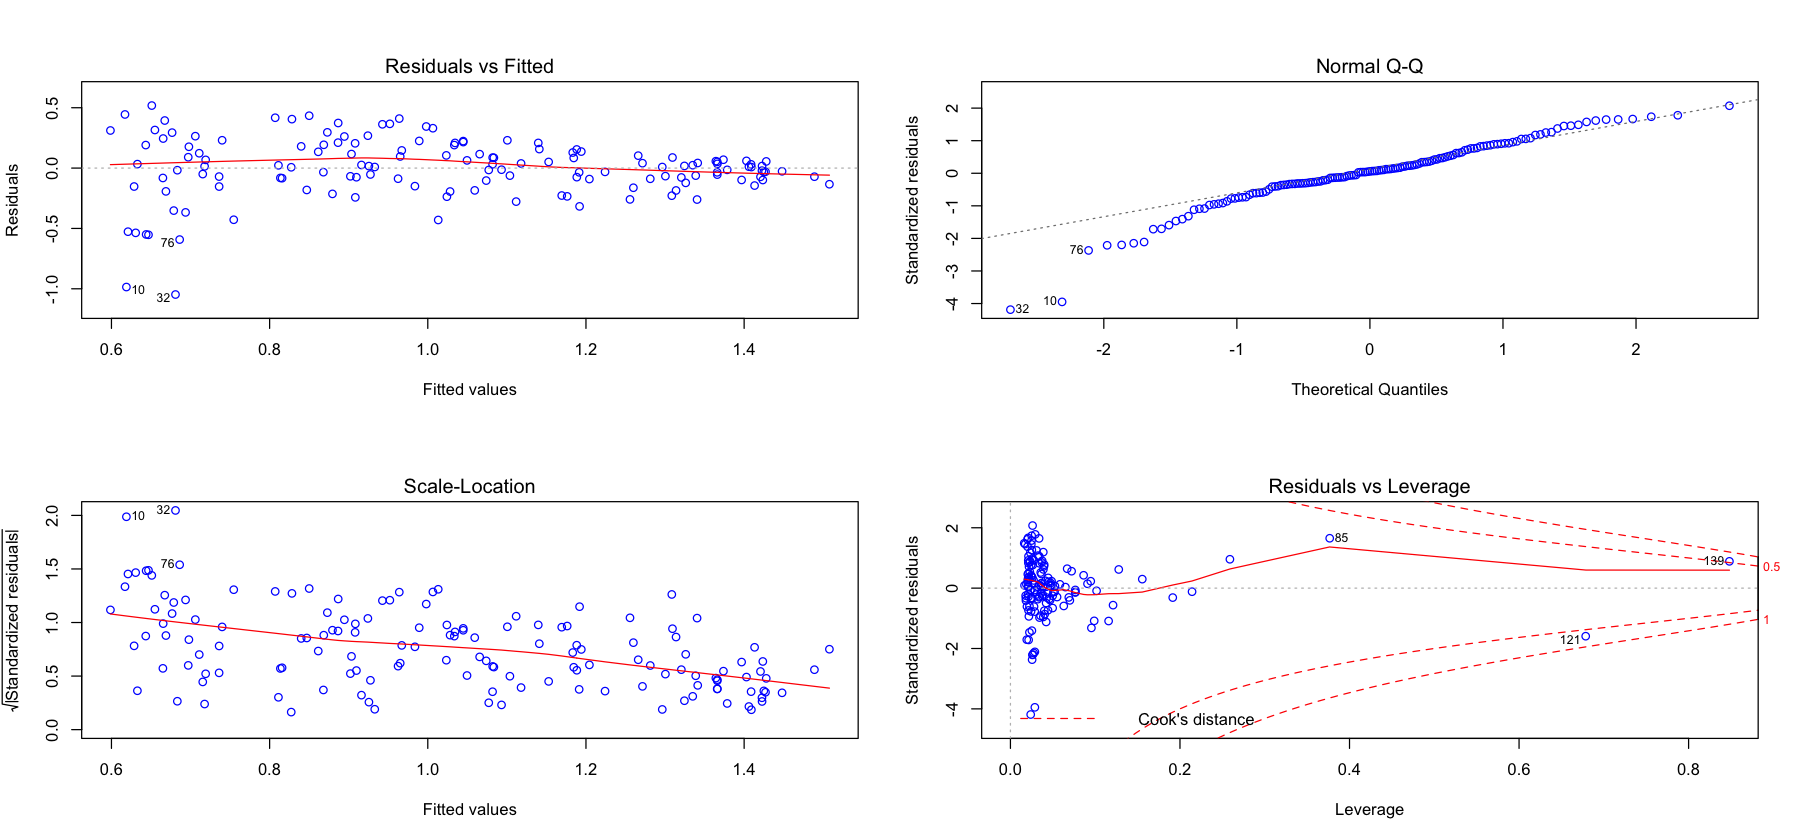

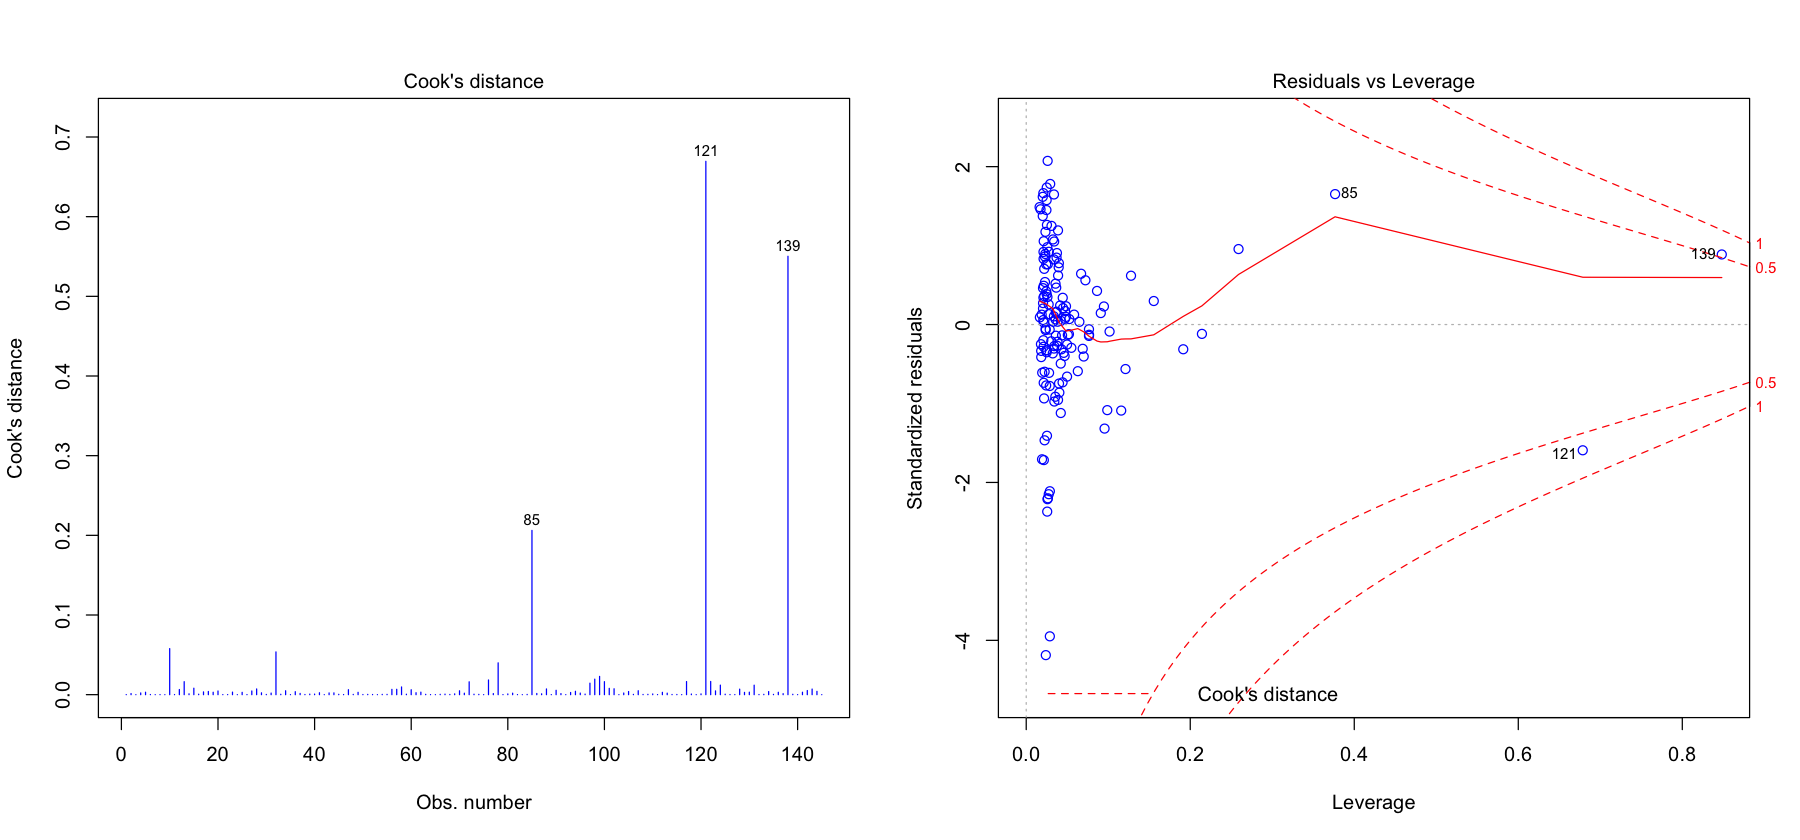

In [92]:
# subdivide the window into 4 parts, 2 rows and 2 columns , residul plot
par(mfrow=c(2,2))
options(repr.plot.width = 15, repr.plot.height = 7)
plot(model.mydata3,col="blue")
### plot the Cook's distance
par(mfrow=c(1,2))
plot(model.mydata3, 4,col="blue")
plot(model.mydata3, 5,col="blue")

Since the residuals are acceptable but not excellent, let's try with smooth splines. In order to find the degrees of freedom I have used the cross validation

In [97]:
set.seed(111)
library(gam)
## CONSIDERA LE VARIABILI NON LINEARI
x1.cv = smooth.spline(x= mydata$pilc, y=mydata$felice, cv=TRUE)
x1.cv 
x2.cv = smooth.spline(x= mydata$salute.spese, y=mydata$felice, cv=TRUE)
x2.cv 


## primo fit considerando le variabili splines smooth
m.gam <- gam(felice ~ s(salute.spese,33)*s(pilc,9) + equatore + I(salute.spese^2) + 
    I(pilc^2)  + s(salute.spese,33):equatore,
#+s(x5, degree of freedoms find before)*x6 (se hai interazione)
#altre variabili del best model,
data=mydata)
summary(m.gam)

Call:
smooth.spline(x = mydata$pilc, y = mydata$felice, cv = TRUE)

Smoothing Parameter  spar= 1.014547  lambda= 0.0002381357 (12 iterations)
Equivalent Degrees of Freedom (Df): 9.530829
Penalized Criterion (RSS): 8.118506
PRESS(l.o.o. CV): 0.3209023

Call:
smooth.spline(x = mydata$salute.spese, y = mydata$felice, cv = TRUE)

Smoothing Parameter  spar= 0.7124379  lambda= 6.895478e-08 (14 iterations)
Equivalent Degrees of Freedom (Df): 33.12003
Penalized Criterion (RSS): 7.841735
PRESS(l.o.o. CV): 4069640

Warning message in model.matrix.default(mt, mf, contrasts):
“non-list contrasts argument ignored”


Call: gam(formula = felice ~ s(salute.spese, 33) * s(pilc, 9) + equatore + 
    I(salute.spese^2) + I(pilc^2) + s(salute.spese, 33):equatore, 
    data = mydata)
Deviance Residuals:
      Min        1Q    Median        3Q       Max 
-0.905132 -0.062871  0.002115  0.105421  0.615052 

(Dispersion Parameter for gaussian family taken to be 0.0637)

    Null Deviance: 18.7416 on 144 degrees of freedom
Residual Deviance: 6.1751 on 96.9999 degrees of freedom
AIC: 51.8416 

Number of Local Scoring Iterations: 30 

Anova for Parametric Effects
                               Df Sum Sq Mean Sq F value    Pr(>F)    
s(salute.spese, 33)             1 4.5124  4.5124 70.8825 3.424e-13 ***
s(pilc, 9)                      1 1.6031  1.6031 25.1823 2.363e-06 ***
equatore                        1 0.5320  0.5320  8.3569 0.0047418 ** 
I(salute.spese^2)               1 2.4878  2.4878 39.0785 1.091e-08 ***
I(pilc^2)                       1 4.1906  4.1906 65.8272 1.540e-12 ***
s(salute.spese, 33):s(pilc, 9) 

In [98]:
## primo fit considerando le variabili splines smooth
m.gam2 <- gam(felice ~ salute.spese*s(pilc,9) + equatore + I(salute.spese^2) + 
    I(pilc^2)  + salute.spese:equatore,
#+s(x5, degree of freedoms find before)*x6 (se hai interazione)
#altre variabili del best model,
data=mydata)
summary(m.gam2)

Warning message in model.matrix.default(mt, mf, contrasts):
“non-list contrasts argument ignored”


Call: gam(formula = felice ~ salute.spese * s(pilc, 9) + equatore + 
    I(salute.spese^2) + I(pilc^2) + salute.spese:equatore, data = mydata)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-0.98887 -0.09104  0.01497  0.12565  0.61879 

(Dispersion Parameter for gaussian family taken to be 0.0589)

    Null Deviance: 18.7416 on 144 degrees of freedom
Residual Deviance: 7.6019 on 129.0005 degrees of freedom
AIC: 17.9822 

Number of Local Scoring Iterations: 30 

Anova for Parametric Effects
                         Df Sum Sq Mean Sq F value    Pr(>F)    
salute.spese              1 4.7245  4.7245 80.1720 3.232e-15 ***
s(pilc, 9)                1 1.4395  1.4395 24.4274 2.350e-06 ***
equatore                  1 0.4666  0.4666  7.9183  0.005661 ** 
I(salute.spese^2)         1 1.9547  1.9547 33.1704 5.864e-08 ***
I(pilc^2)                 1 4.2588  4.2588 72.2707 3.996e-14 ***
salute.spese:s(pilc, 9)   1 0.0021  0.0021  0.0356  0.850552    
salute.spese:equatore     1 0.

In [102]:
m.gam3<- update(m.gam2, .~.-salute.spese:s(pilc, 9))
summary(m.gam3)

Warning message in model.matrix.default(mt, mf, contrasts):
“non-list contrasts argument ignored”


Call: gam(formula = felice ~ salute.spese + s(pilc, 9) + equatore + 
    I(salute.spese^2) + I(pilc^2) + salute.spese:equatore, data = mydata)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-0.99815 -0.10228  0.02286  0.10933  0.61120 

(Dispersion Parameter for gaussian family taken to be 0.0595)

    Null Deviance: 18.7416 on 144 degrees of freedom
Residual Deviance: 7.7388 on 130.0005 degrees of freedom
AIC: 18.5698 

Number of Local Scoring Iterations: 30 

Anova for Parametric Effects
                       Df Sum Sq Mean Sq F value    Pr(>F)    
salute.spese            1 4.6352  4.6352 77.8655 6.345e-15 ***
s(pilc, 9)              1 1.5652  1.5652 26.2938 1.038e-06 ***
equatore                1 0.5215  0.5215  8.7610  0.003658 ** 
I(salute.spese^2)       1 2.2939  2.2939 38.5347 6.692e-09 ***
I(pilc^2)               1 4.6845  4.6845 78.6925 4.887e-15 ***
salute.spese:equatore   1 0.3310  0.3310  5.5611  0.019855 *  
Residuals             130 7.7388  0.0595    

In [103]:
anova(m.gam2,m.gam3)

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
129.0005,7.601886,NA,NA,NA
130.0005,7.738759,-1,-0.1368733,0.1275005


From the output,based on $P-value$ we see that we do need smoothing splines for lotsize.
Furthermore from the plot we see that as much observation we have as the CI is close to the line as the fit is good.

In the following plot we there are the  predictions based on this model.

Warning message in preplot.Gam(x, terms = terms):
“No terms saved for "a:b" style interaction terms”

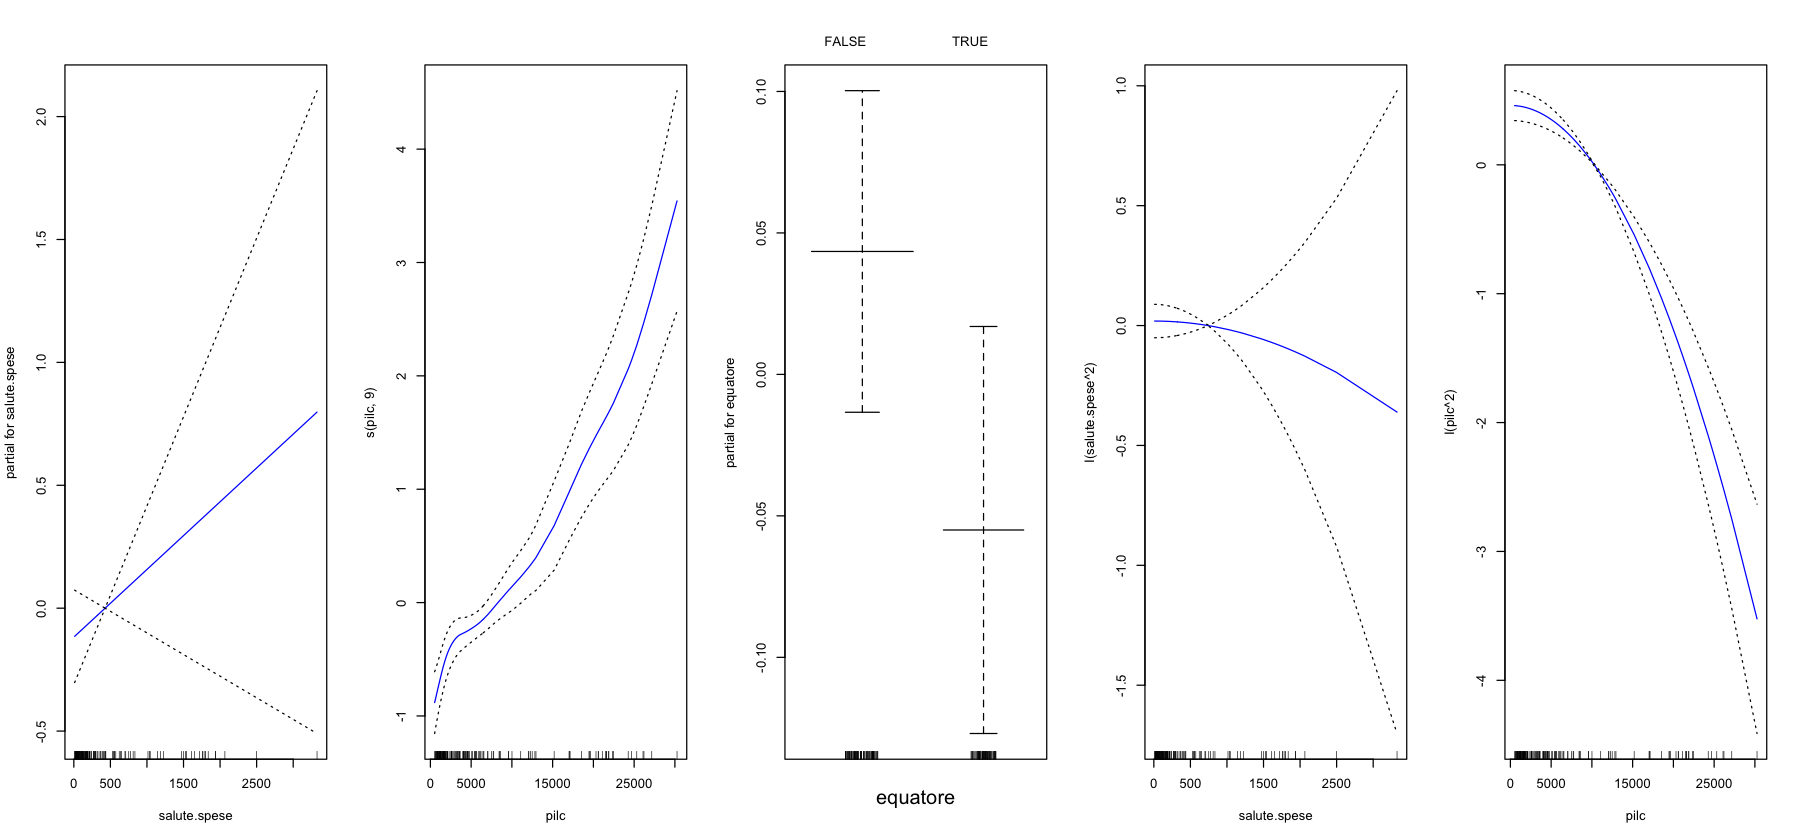

In [104]:
par(mfrow=c(1,5))
plot(m.gam3, se=TRUE,col="blue")

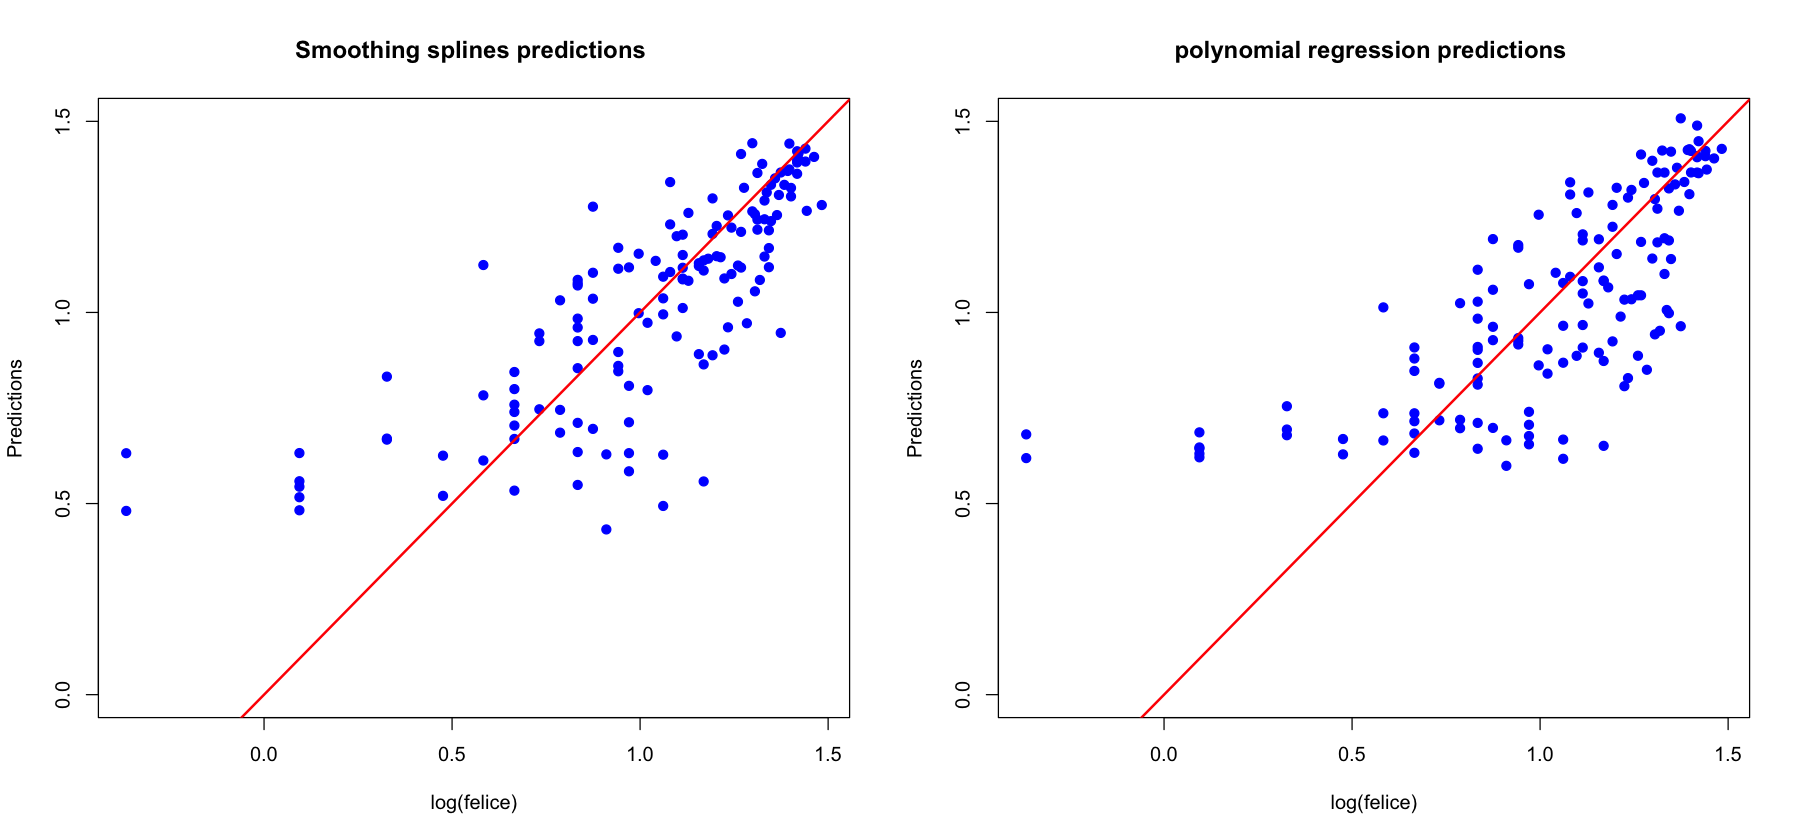

In [115]:
### plot prediction

par(mfrow=c(1,2))
options(repr.plot.width = 15, repr.plot.height = 7)
plot(mydata$felice, predict(m.gam3), xlab='log(felice)', ylab='Predictions',
       pch=19, main='Smoothing splines predictions ',col="blue",ylim=c(0,1.5))
abline(0, 1, col='red', lwd=2)
plot(mydata$felice, predict(model.mydata3), xlab='log(felice)', ylab='Predictions',
       pch=19, main='polynomial regression predictions ',col="blue",ylim=c(0,1.5))
abline(0, 1, col='red', lwd=2)

### RIDGE
Let's consider all the dataset.

In [175]:
## load the data

load("Felice.RData")
ls()
names(felicita)
mydata<-felicita
nrow(mydata)
ncol(mydata)


mydata[1:3,]

summary(mydata)
#check NA values
sum(is.na(mydata))
#clean from NA
mydata <- na.omit(mydata)

mydata$felice<-log((mydata$felice))
#to remove infinite
which(mydata$felice=="-Inf")
mydata<-mydata[-129,]

[1] "X"                "best.lambda"      "cv.lasso"         "cv.ridge"        
 [5] "felicita"         "id.zero"          "m.forward"        "m.gam"           
 [9] "m.gam2"           "m.gam3"           "m.glm"            "m.lasso"         
[13] "m.lasso.min"      "m.ridge"          "m.ridge.min"      "model.mydata"    
[17] "model.mydata2"    "model.mydata3"    "mse"              "mydata"          
[21] "nonzero"          "p.mglm"           "prediction.lasso" "prediction.ridge"
[25] "rmse"             "x"                "x1.cv"            "x2.cv"           
[29] "y"

[1] "salute.indice" "salute.spese"  "istruzione"    "vita"         
 [5] "reddito.distr" "equatore"      "popden"        "spese.pagate" 
 [9] "pilc"          "banca"         "democrazia"    "oecd"         
[13] "felice"

[1] 146

[1] 13

salute.indice,salute.spese,istruzione,vita,reddito.distr,equatore,popden,spese.pagate,pilc,banca,democrazia,oecd,felice
52.12959,28.28851,1.358772,37.62949,0.334725,FALSE,38.88943,40.6,884.0158,-1.233,-1.616,FALSE,2.302585
52.28271,47.17409,2.248598,37.92818,0.444238,TRUE,936.08110,59.6,1310.3910,-1.390,-1.003,FALSE,2.397895
76.70827,63.53210,4.889030,60.17352,0.441193,FALSE,115.95570,77.7,1815.2030,-0.653,-0.008,FALSE,2.564949


 salute.indice    salute.spese       istruzione           vita      
 Min.   :35.69   Min.   :  11.06   Min.   : 0.9271   Min.   :25.92  
 1st Qu.:63.31   1st Qu.:  57.19   1st Qu.: 3.6304   1st Qu.:45.77  
 Median :75.04   Median : 155.22   Median : 5.9437   Median :60.11  
 Mean   :73.20   Mean   : 425.00   Mean   : 5.8078   Mean   :56.43  
 3rd Qu.:82.72   3rd Qu.: 503.84   3rd Qu.: 8.1321   3rd Qu.:65.91  
 Max.   :92.67   Max.   :3326.02   Max.   :11.5000   Max.   :74.10  
 reddito.distr     equatore      popden           spese.pagate  
 Min.   :0.1873   FALSE:81   Min.   :    1.983   Min.   : 8.60  
 1st Qu.:0.3168   TRUE :65   1st Qu.:   42.072   1st Qu.:40.62  
 Median :0.3679              Median :   99.951   Median :57.55  
 Mean   :0.3752              Mean   :  851.231   Mean   :56.75  
 3rd Qu.:0.4425              3rd Qu.:  309.899   3rd Qu.:74.00  
 Max.   :0.6091              Max.   :29313.080   Max.   :96.90  
      pilc             banca            democrazia          oe

[1] 0

[1] 129

In [176]:
library(glmnet)
y <-  mydata$felice
X <- model.matrix(felice ~ .+I(salute.spese^2)+I(pilc^2)+salute.spese:equatore+s(pilc,9), data=mydata)[,-1]
m.ridge <- glmnet(X, y, alpha=0)
m.ridge


Call:  glmnet(x = X, y = y, alpha = 0) 

       Df      %Dev    Lambda
  [1,] 16 7.025e-36 253.60000
  [2,] 16 1.061e-02 231.10000
  [3,] 16 1.162e-02 210.50000
  [4,] 16 1.273e-02 191.80000
  [5,] 16 1.394e-02 174.80000
  [6,] 16 1.526e-02 159.30000
  [7,] 16 1.671e-02 145.10000
  [8,] 16 1.828e-02 132.20000
  [9,] 16 2.000e-02 120.50000
 [10,] 16 2.187e-02 109.80000
 [11,] 16 2.391e-02 100.00000
 [12,] 16 2.613e-02  91.13000
 [13,] 16 2.854e-02  83.04000
 [14,] 16 3.116e-02  75.66000
 [15,] 16 3.401e-02  68.94000
 [16,] 16 3.710e-02  62.81000
 [17,] 16 4.045e-02  57.23000
 [18,] 16 4.408e-02  52.15000
 [19,] 16 4.800e-02  47.52000
 [20,] 16 5.223e-02  43.30000
 [21,] 16 5.678e-02  39.45000
 [22,] 16 6.169e-02  35.94000
 [23,] 16 6.696e-02  32.75000
 [24,] 16 7.261e-02  29.84000
 [25,] 16 7.866e-02  27.19000
 [26,] 16 8.512e-02  24.78000
 [27,] 16 9.199e-02  22.57000
 [28,] 16 9.931e-02  20.57000
 [29,] 16 1.071e-01  18.74000
 [30,] 16 1.152e-01  17.08000
 [31,] 16 1.239e-01  15.5600


We see that  16  over the graph indicate the number of covariates entering the model as  $ \lambda$ varies: 61 is repeated, as ridge regression is not a selection method.

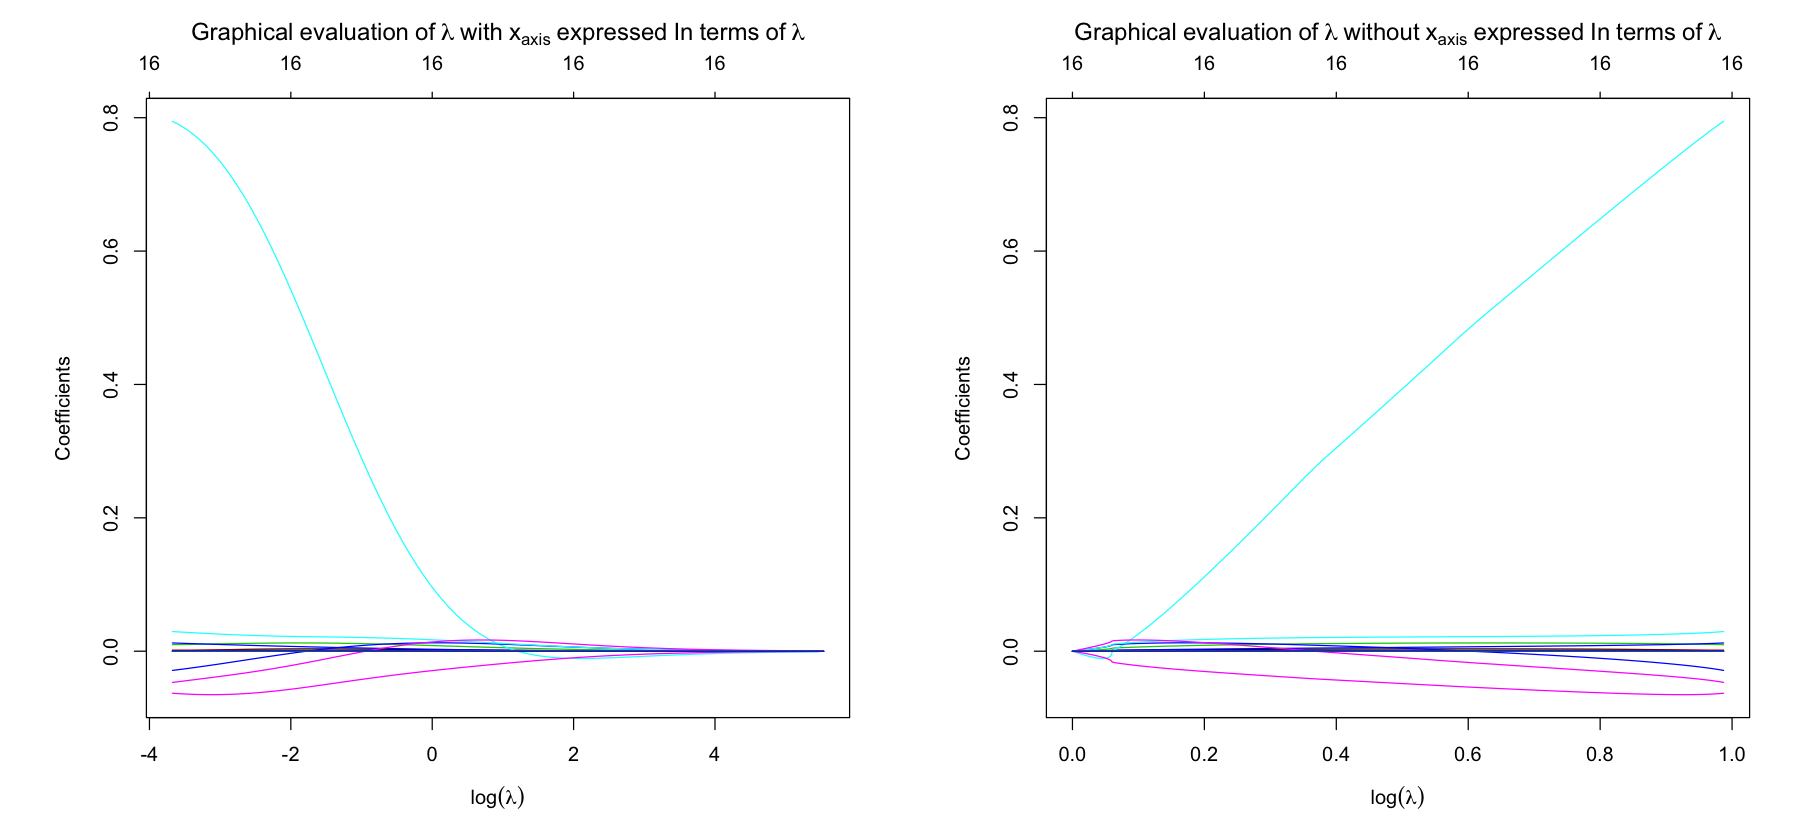

In [177]:
## plot graphical evaluation

options(repr.plot.width = 15, repr.plot.height = 7)
par(mar = c(5.1, 6.1, 4.1, 2.1))
    par(mfrow=c(1,2))

plot(m.ridge, xvar='lambda', xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)
plot(m.ridge, xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~without~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

Now let's look for the best $\lambda$ using cross validation.
The plot below shows the values of $cvm$ for each $log(\lambda)$ together with the associated confidence interval. The two dashed lines are the values of minimun $log(\lambda)$  and $log(\lambda)$ $1 \sigma$ far from the minimum. \
So the best $\lambda$  from cross validation is: 0.028 \
And the MSE is: 0.062

[1] 0.02783067

[1] 0.06236211

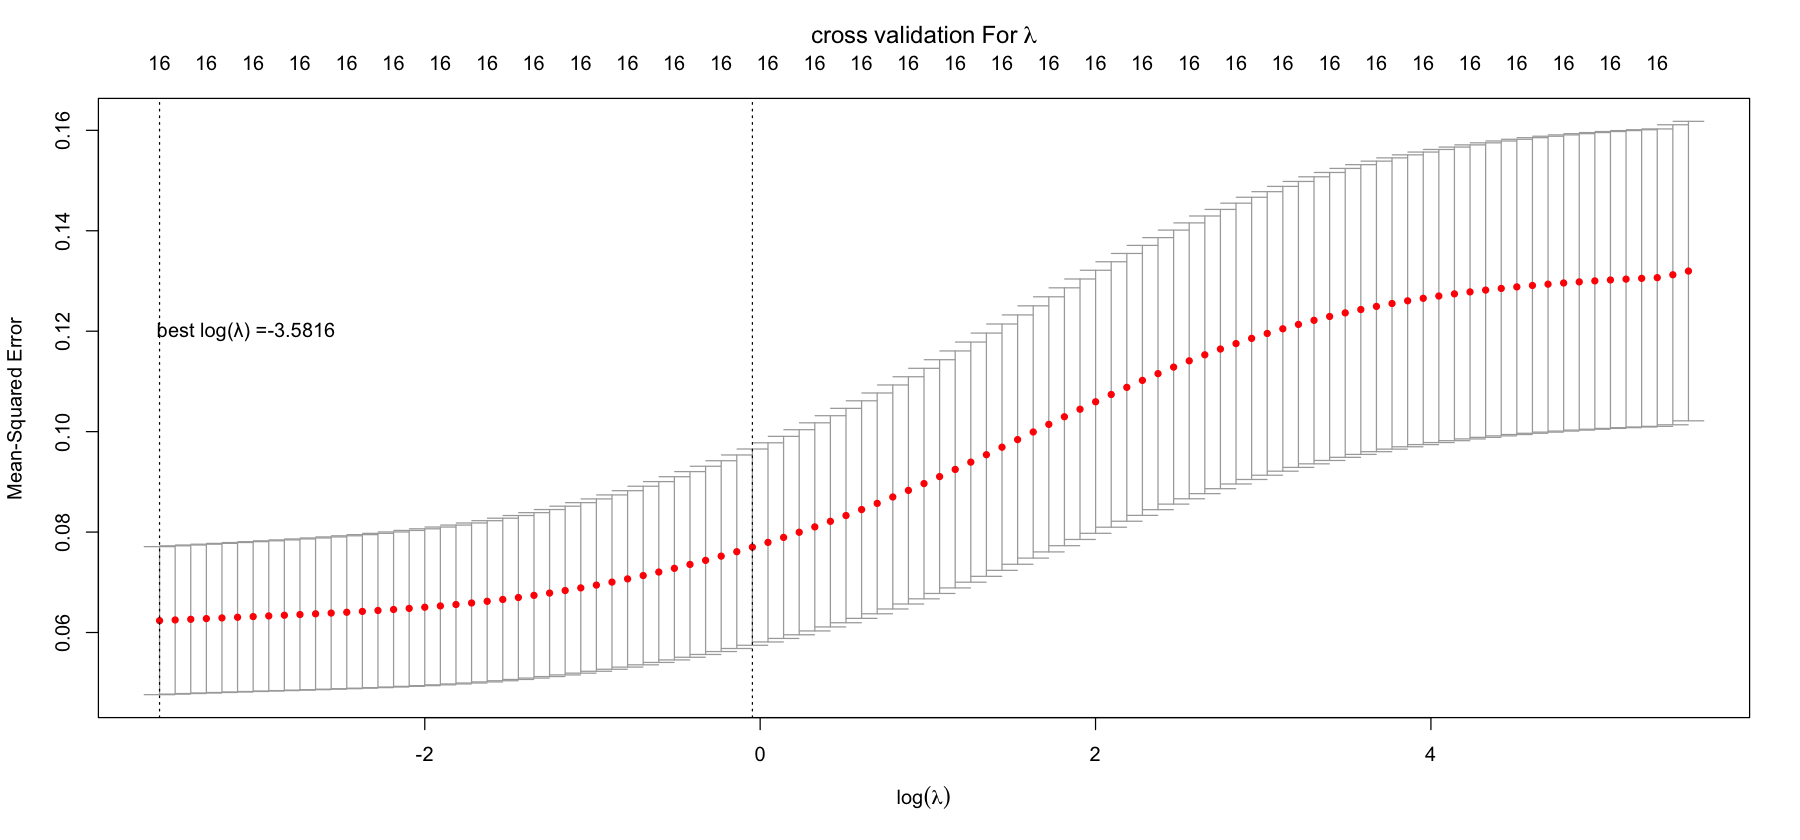

In [178]:
### cross validation plot

set.seed(2906)
options(warn=-1)
cv.ridge <- cv.glmnet(X, y, alpha=0)
plot(cv.ridge, xlab=expression(log(lambda)))
text(x=log(cv.ridge$lambda.min)+0.5, y=0.12, paste0(" best log(λ) =",round((log(cv.ridge$lambda.min)),4)))
title(expression(cross ~ validation ~For~ symbol(l)),line=2.7)

## best lambda and MSE

best.lambda <- cv.ridge$lambda.min
best.lambda

mse<-min(cv.ridge$cvm)
mse


Now we can Re-estimate the model using the best $\lambda$.
Below we seen the coefficients of the model, graphical representation of the coefficients for the best $\lambda$ and model deviance. \
The maximum explained deviance is obtained for the minimum (best) $\lambda$  and it is equal to:0.59


Call:  glmnet(x = X, y = y, alpha = 0, lambda = best.lambda) 

     Df   %Dev  Lambda
[1,] 16 0.5871 0.02783

17 x 1 sparse Matrix of class "dgCMatrix"
                                     s0
(Intercept)               -2.274338e-01
salute.indice              4.322625e-04
salute.spese               7.284373e-05
istruzione                 9.934083e-03
vita                       1.200019e-02
reddito.distr              7.903563e-01
equatoreTRUE              -6.355983e-02
popden                     7.419371e-07
spese.pagate               1.723176e-03
pilc                       7.483834e-06
banca                     -2.773193e-02
democrazia                 2.888637e-02
oecdTRUE                  -4.560770e-02
I(salute.spese^2)         -1.080347e-08
I(pilc^2)                 -2.539391e-10
s(pilc, 9)                 7.758623e-06
salute.spese:equatoreTRUE  4.200933e-04

[1] 0.588675

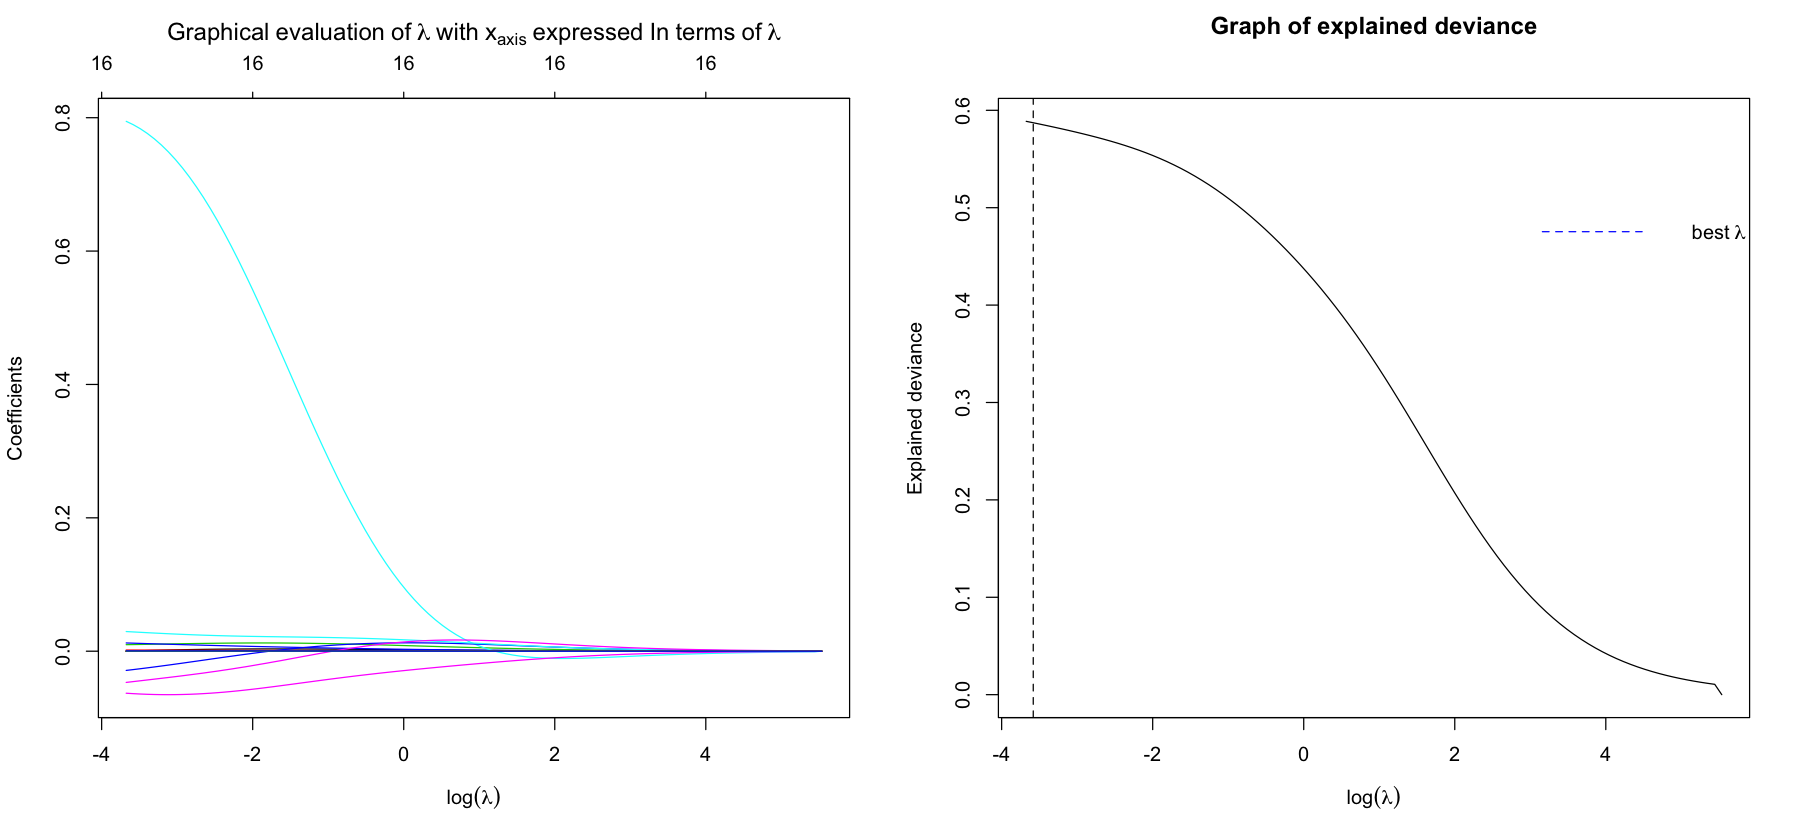

In [179]:
#### best model

m.ridge.min <- glmnet(X, y, alpha=0, lambda=best.lambda)
m.ridge.min
coef(m.ridge.min)

par(mfrow=c(1,2))
plot(m.ridge, xvar='lambda', xlab=expression(log(lambda))) ## add on the line corresponding to the best lambda abline(v=log(best.lambda), lty=2)
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

## deviance
plot(log(m.ridge$lambda), m.ridge$dev.ratio, type='l',
       xlab=expression(log(lambda)), ylab='Explained deviance')
abline(v=log(best.lambda), lty=2,color="blue")
legend(legend = expression(best~ symbol(l)), col="blue",lt=2,x = 2.5,bty="n", y=0.5)
title ("Graph of explained deviance",line=2.7)


## maxi explained deviance
max(m.ridge$dev.ratio)

### LASSO

Let's perform the analysis usign lasso

In [180]:
## lasso regression

library(glmnet)
m.lasso <- glmnet(X, y, alpha=1)
m.lasso


Call:  glmnet(x = X, y = y, alpha = 1) 

      Df    %Dev    Lambda
 [1,]  0 0.00000 0.2536000
 [2,]  1 0.08447 0.2311000
 [3,]  1 0.15460 0.2105000
 [4,]  1 0.21280 0.1918000
 [5,]  1 0.26120 0.1748000
 [6,]  1 0.30130 0.1593000
 [7,]  1 0.33460 0.1451000
 [8,]  1 0.36230 0.1322000
 [9,]  1 0.38520 0.1205000
[10,]  1 0.40430 0.1098000
[11,]  2 0.42170 0.1000000
[12,]  2 0.43750 0.0911300
[13,]  2 0.45050 0.0830400
[14,]  2 0.46140 0.0756600
[15,]  3 0.47090 0.0689400
[16,]  3 0.47920 0.0628100
[17,]  3 0.48620 0.0572300
[18,]  3 0.49190 0.0521500
[19,]  5 0.49790 0.0475200
[20,]  4 0.50490 0.0433000
[21,]  7 0.51540 0.0394500
[22,]  7 0.52600 0.0359400
[23,]  7 0.53480 0.0327500
[24,]  7 0.54210 0.0298400
[25,]  7 0.54820 0.0271900
[26,]  7 0.55320 0.0247800
[27,]  7 0.55740 0.0225700
[28,]  7 0.56080 0.0205700
[29,]  7 0.56370 0.0187400
[30,]  7 0.56610 0.0170800
[31,]  7 0.56810 0.0155600
[32,]  7 0.56970 0.0141800
[33,]  8 0.57110 0.0129200
[34,]  9 0.57230 0.0117700
[35,]  9 0.57


Above we can see the graphical evaluation of the coefficients associated to the covariates.
We see that 16 over the graph indicate the number of covariates entering the model as  $ \lambda$ varies:16 is not repeated, as lasso regression is a selection method.


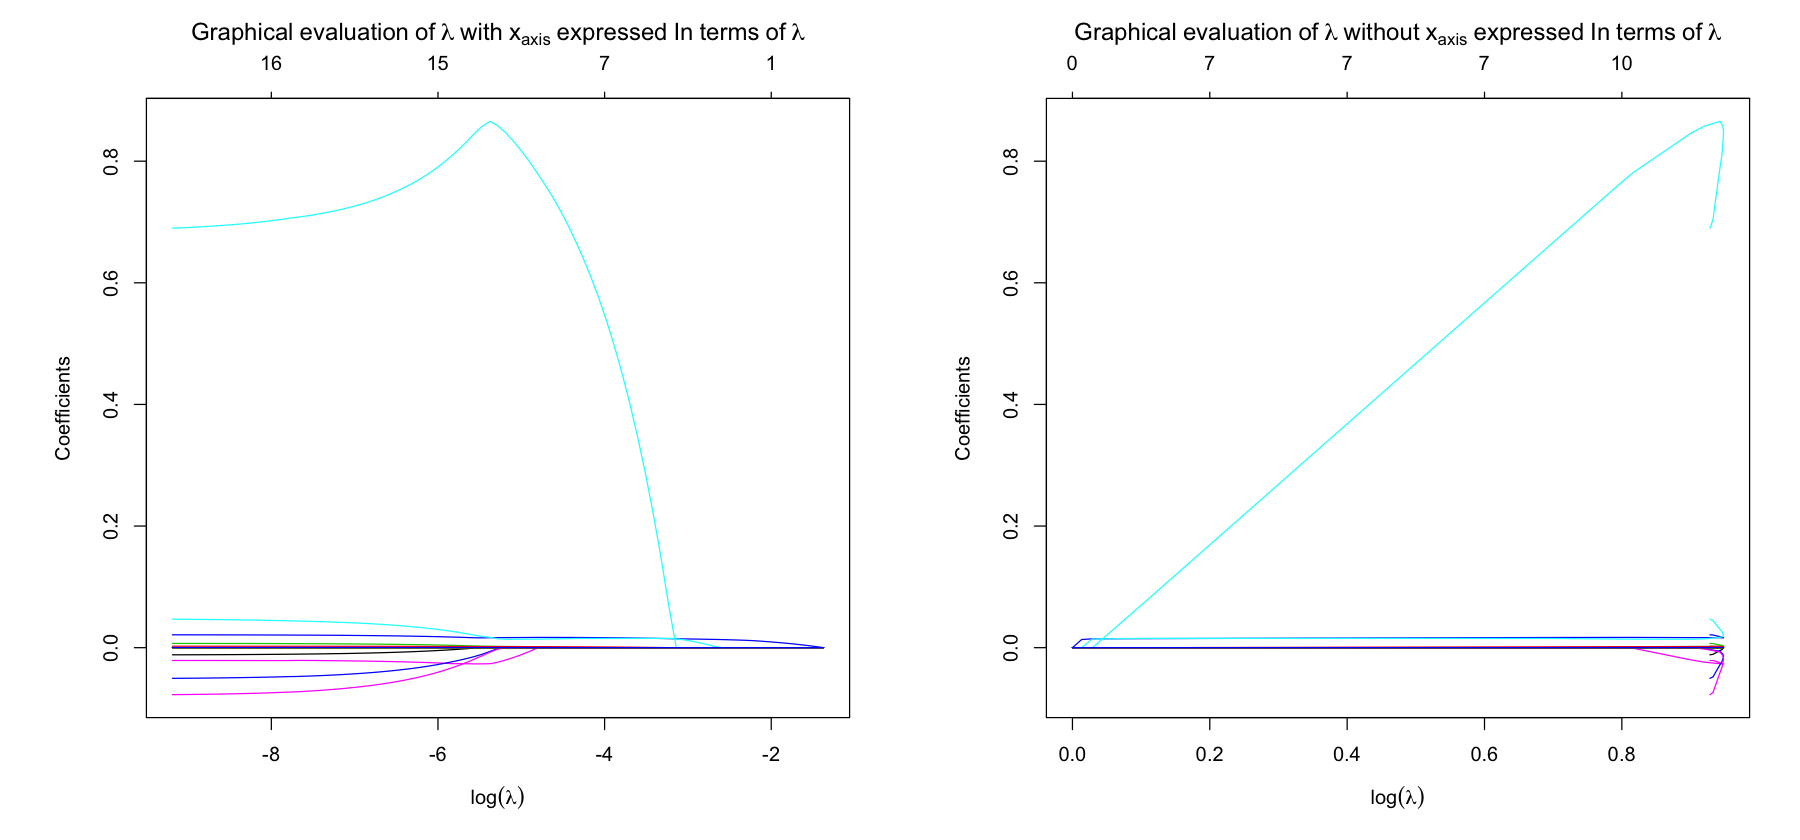

In [181]:
options(repr.plot.width = 15, repr.plot.height = 7)
par(mar = c(5.1, 6.1, 4.1, 2.1))
    par(mfrow=c(1,2))

plot(m.lasso, xvar='lambda', xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)
plot(m.lasso, xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~without~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

Now let's look for the best $\lambda$ using cross validation.
So the best $\lambda$  from cross validation is: 0.0005 \
And the MSE is: 0.06

[1] 0.0005463273

[1] 0.0601477

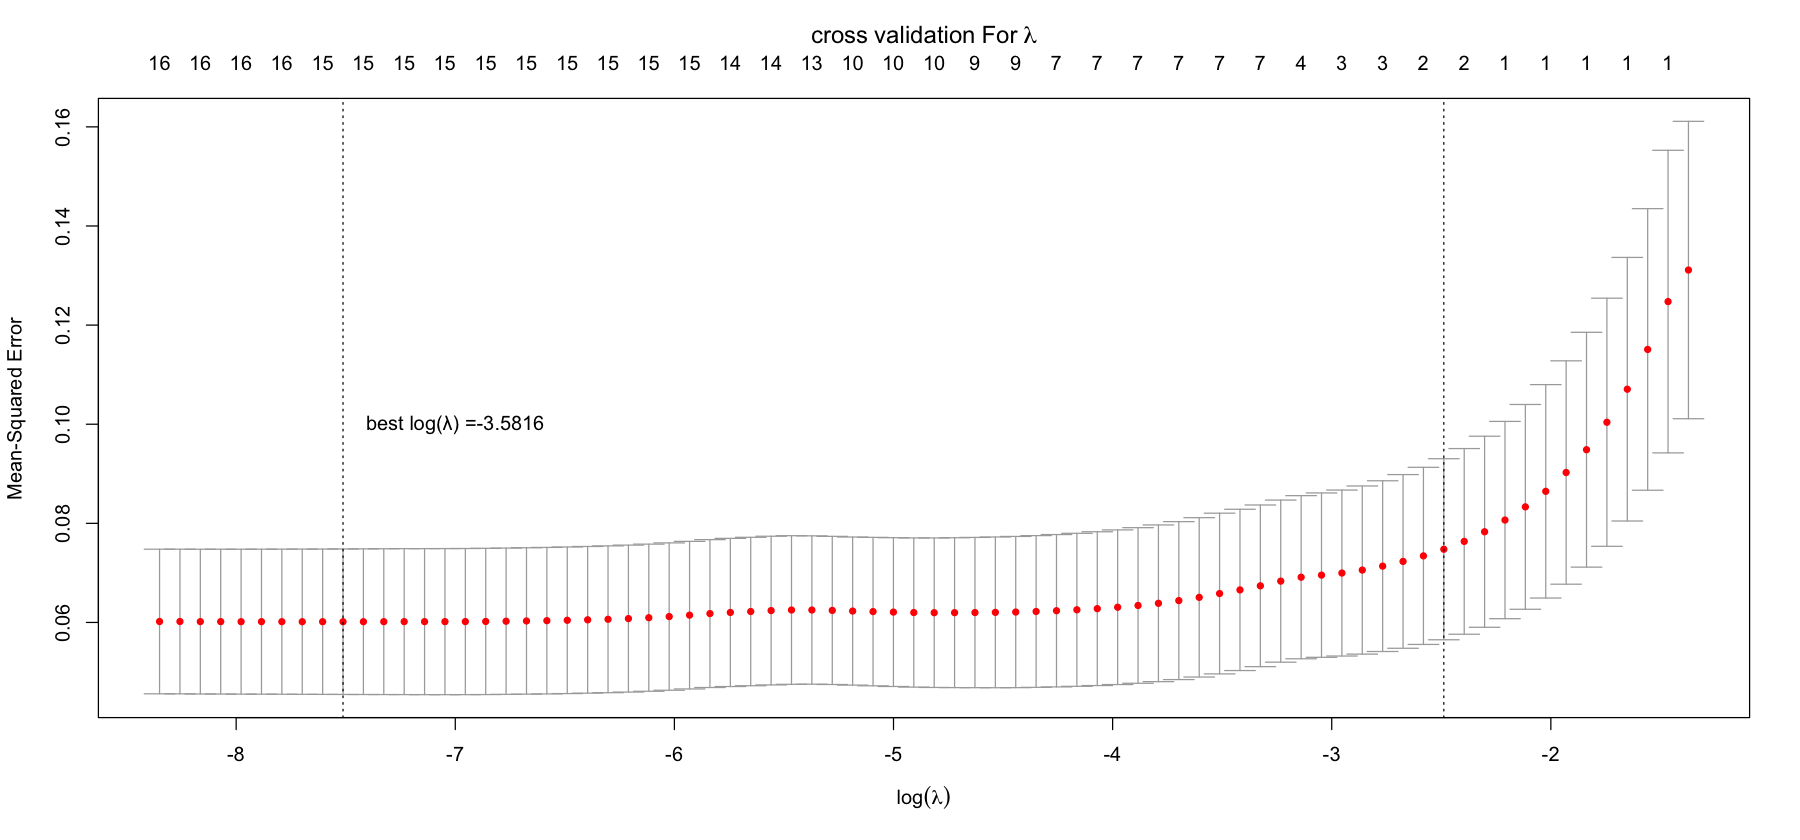

In [182]:
set.seed(2906)
options(warn=-1)
cv.lasso <- cv.glmnet(X, y, alpha=1)
plot(cv.lasso, xlab=expression(log(lambda)))
text(x=log(cv.lasso$lambda.min)+0.5, y=0.1, paste0(" best log(λ) =",round((log(cv.lasso$lambda.min)),4)))
title(expression(cross ~ validation ~For~ symbol(l)),line=2.7)

## best lambda and MSE

best.lambda <- cv.lasso$lambda.min
best.lambda

mse<-min(cv.lasso$cvm)
mse


On the basis of MSE , the model fitted with lasso is preferable. In addition, the resulting model with lasso is simplest.
Now we can Re-estimate the model using the best $\lambda$.
Below we seen the coefficients of the model, graphical representation of the coefficients for the best $\lambda$ and model deviance. \
The maximum explained deviance is obtained for the minimum (best) $\lambda$  and it is equal to: 0.61 \
Furthermore from the new coefficients we can see that some of the coefficients are zero, so the lasso performed a model selection. In particular the are not coefficients equal to 0.


Call:  glmnet(x = X, y = y, alpha = 1, lambda = best.lambda) 

     Df   %Dev    Lambda
[1,] 16 0.6118 0.0005463

17 x 1 sparse Matrix of class "dgCMatrix"
                                     s0
(Intercept)               -1.700756e-02
salute.indice             -1.054962e-02
salute.spese               7.631233e-05
istruzione                 6.609080e-03
vita                       2.065851e-02
reddito.distr              7.086139e-01
equatoreTRUE              -2.103704e-02
popden                     1.992630e-06
spese.pagate               2.343436e-03
pilc                       1.847621e-05
banca                     -4.648825e-02
democrazia                 4.351713e-02
oecdTRUE                  -7.104034e-02
I(salute.spese^2)          5.393279e-10
I(pilc^2)                 -1.213329e-09
s(pilc, 9)                 2.577234e-05
salute.spese:equatoreTRUE  3.286591e-04

[1] 17

[1] 0.6123278

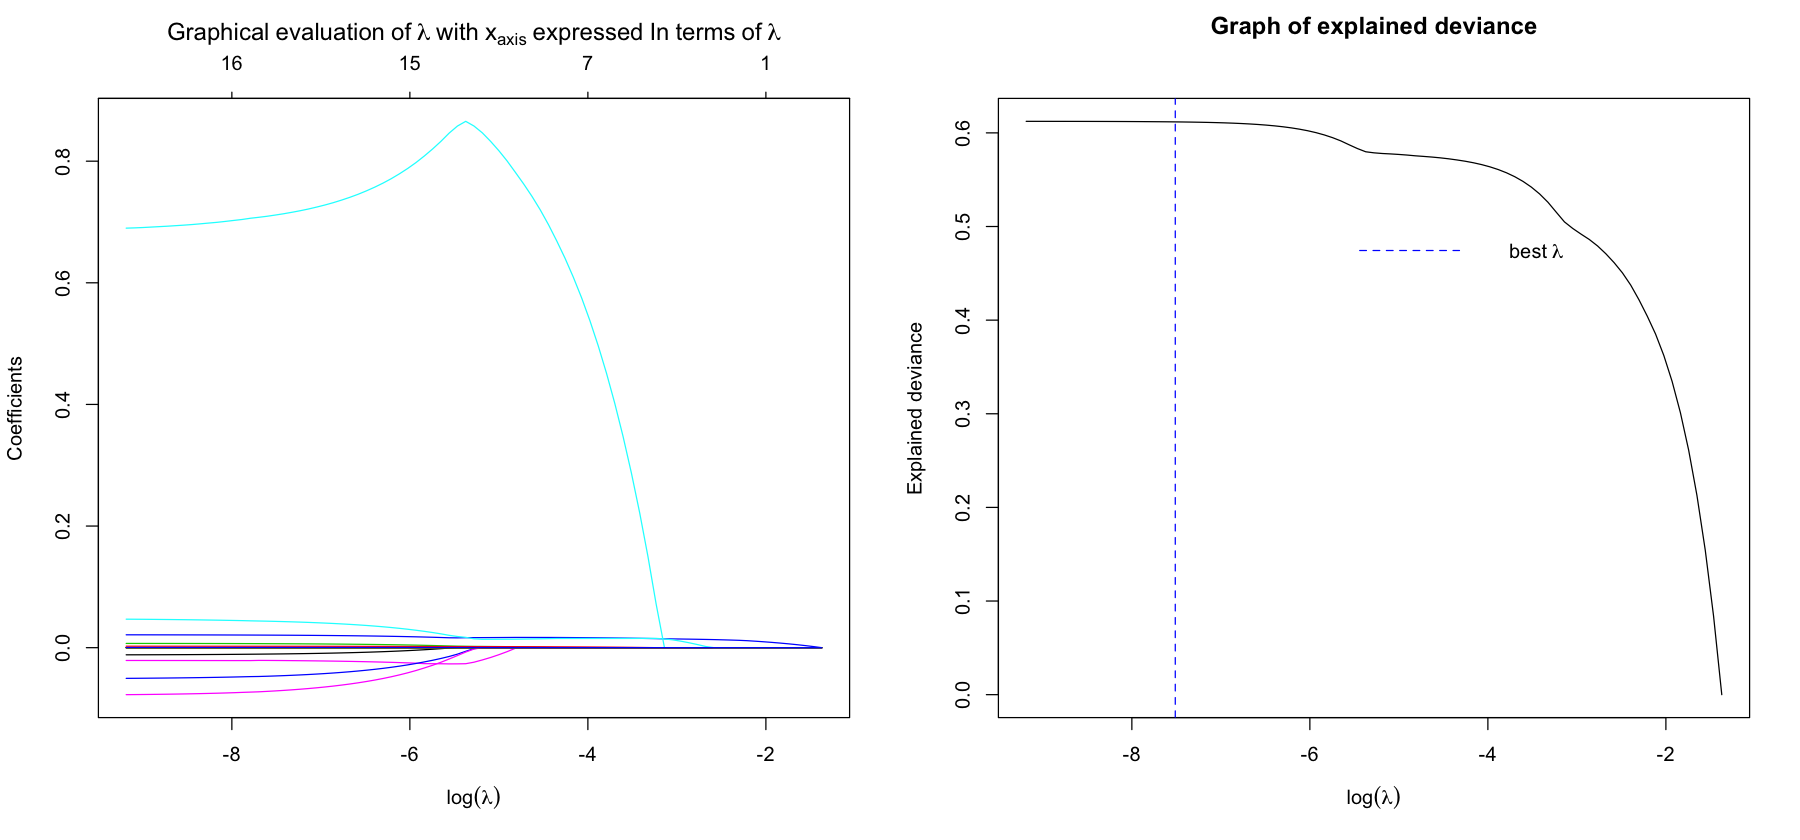

In [183]:
#### best model

m.lasso.min <- glmnet(X, y, alpha=1, lambda=best.lambda)
m.lasso.min
coef(m.lasso.min)

## number of coefficient diversi da 0

id.zero <- which(coef(m.lasso.min)==0)
nonzero <- length(coef(m.lasso.min))-length(id.zero)
nonzero



par(mfrow=c(1,2))
plot(m.lasso, xvar='lambda', xlab=expression(log(lambda))) ## add on the line corresponding to the best lambda abline(v=log(best.lambda), lty=2)
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

## deviance
plot(log(m.lasso$lambda), m.lasso$dev.ratio, type='l',
        xlab=expression(log(lambda)), ylab='Explained deviance')
abline(v=log(best.lambda), lty=2,col="blue")
legend(legend = expression(best~ symbol(l)), col="blue",lt=2,x = -6,bty="n", y=0.5)
title ("Graph of explained deviance",line=2.7)


## maxi explained deviance
max(m.lasso$dev.ratio)

Compare the results with those from the linear model.
We have that :
- MSE for lasso is:0.06
- MSE for linear model is:0.23
 
No net difference. But since there is no substantial variable selection, it does not seem to be so interesting.

In [184]:
### CALCOLO MSE PER GAM SU TEST SET
### TI CONVIENE CONSIDERARE UN TEST SET E TRAINING SET


m.glm <- gam(felice ~ salute.spese + s(pilc, 9) + equatore + I(salute.spese^2) + I(pilc^2) + salute.spese:equatore, data=mydata)
p.mglm=predict(m.glm,newdata=mydata)
rmse <- sqrt(mean((mydata$felice - p.mglm)^2))
rmse 

[1] 0.2310221

### AUTOMATIC SELECTION

#### FORWARD SELECTION

In [185]:
library(leaps)
m.forward <- regsubsets(felice ~ .+I(salute.spese^2)+I(pilc^2)+salute.spese:equatore+s(pilc,9), data=mydata, nvmax=17, method='forward')
summary(m.forward )

Reordering variables and trying again:


Subset selection object
Call: regsubsets.formula(felice ~ . + I(salute.spese^2) + I(pilc^2) + 
    salute.spese:equatore + s(pilc, 9), data = mydata, nvmax = 17, 
    method = "forward")
16 Variables  (and intercept)
                          Forced in Forced out
salute.indice                 FALSE      FALSE
salute.spese                  FALSE      FALSE
istruzione                    FALSE      FALSE
vita                          FALSE      FALSE
reddito.distr                 FALSE      FALSE
equatoreTRUE                  FALSE      FALSE
popden                        FALSE      FALSE
spese.pagate                  FALSE      FALSE
pilc                          FALSE      FALSE
banca                         FALSE      FALSE
democrazia                    FALSE      FALSE
oecdTRUE                      FALSE      FALSE
I(salute.spese^2)             FALSE      FALSE
I(pilc^2)                     FALSE      FALSE
salute.spese:equatoreTRUE     FALSE      FALSE
s(pilc, 9)                    F

In [186]:
## BIC and RSS

#rss
which.min(summary(m.forward)$rss)


# BIc
which.min(summary(m.forward)$bic)

[1] 15

[1] 3


- the model with the smallest RSS is the model with 15 covariates
- usign BIC instead the best model includes 3 covariates

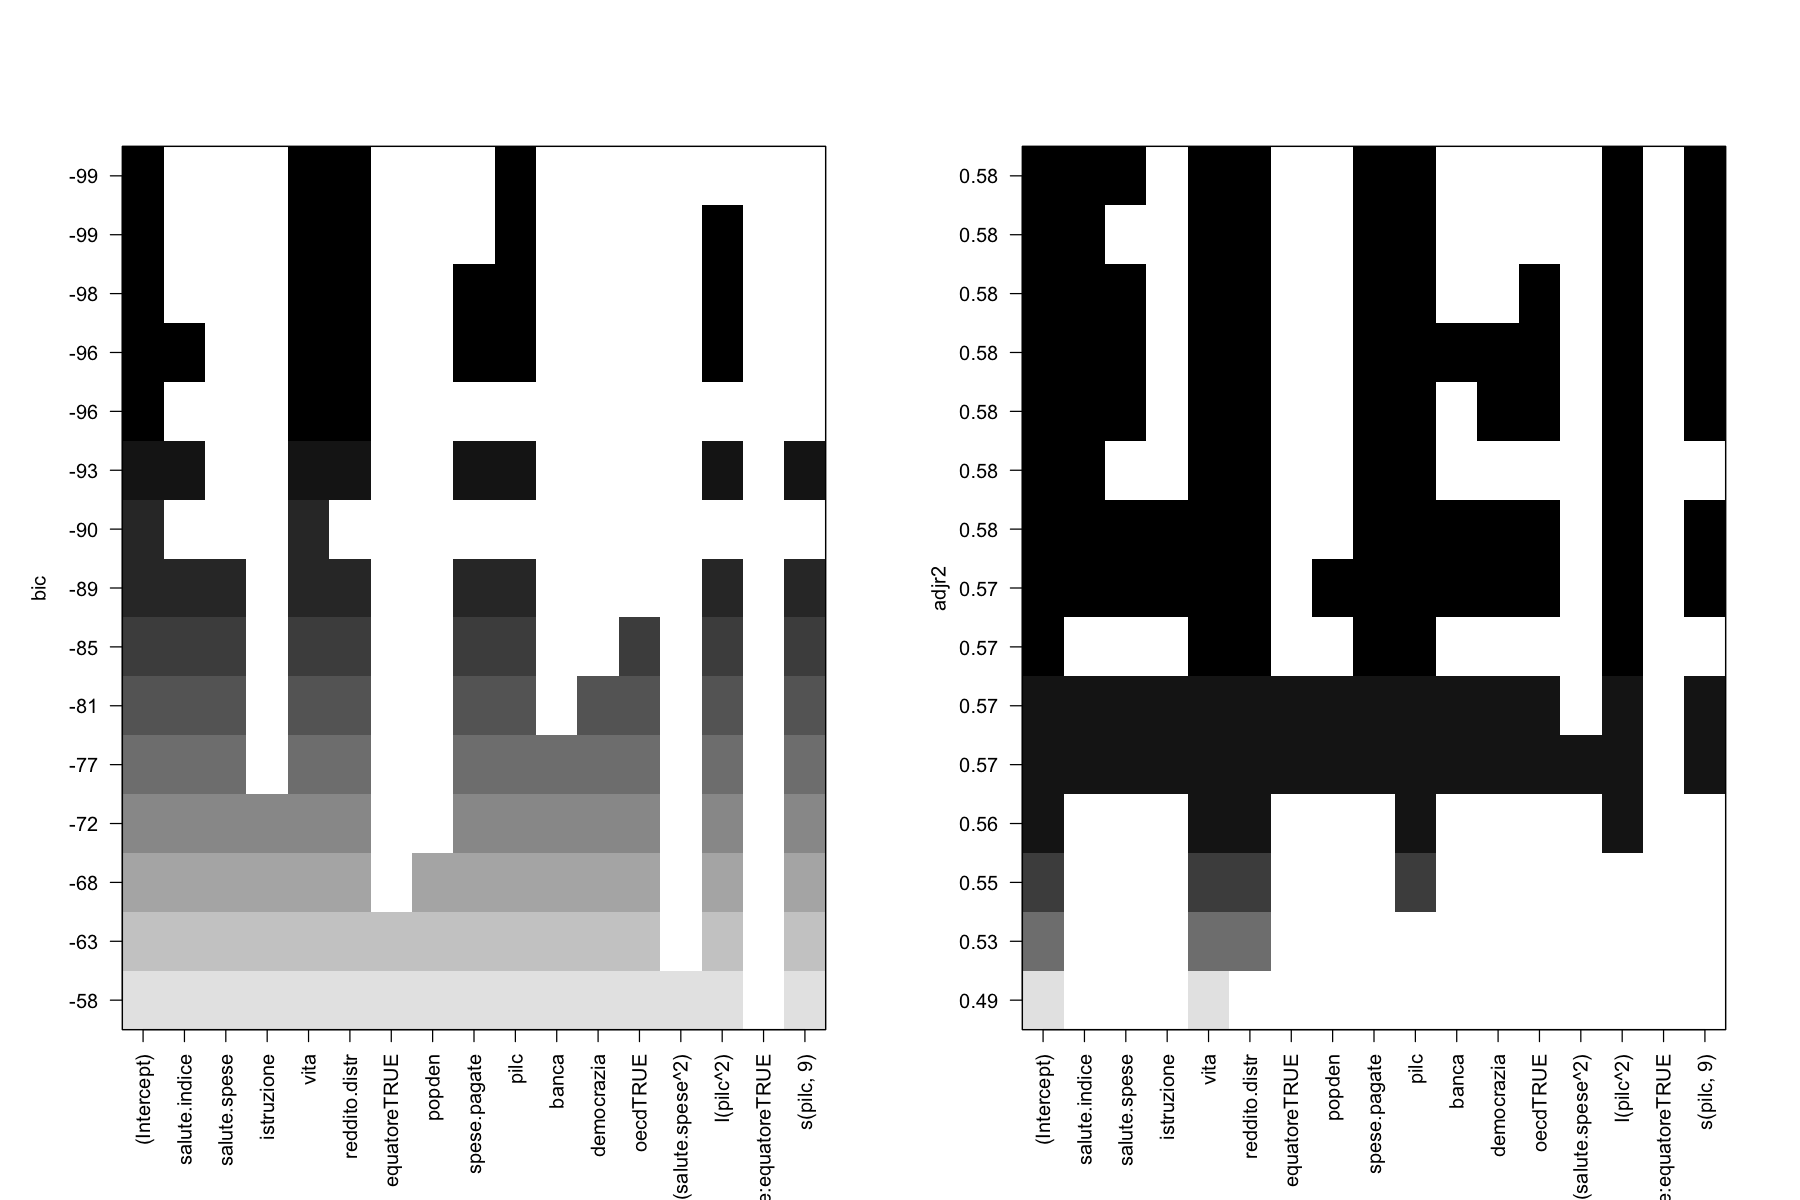

In [189]:
par(mfrow=c(1,2))
options(repr.plot.width = 15, repr.plot.height = 10)
plot(m.forward)
plot(m.forward, scale='adjr2')

we see as computed before that the best model basing on BIC is 9

[1] "the number of covariates for the best model base on BIC and AdjR2 are: 8 for adjr2 and 3 for BIC"

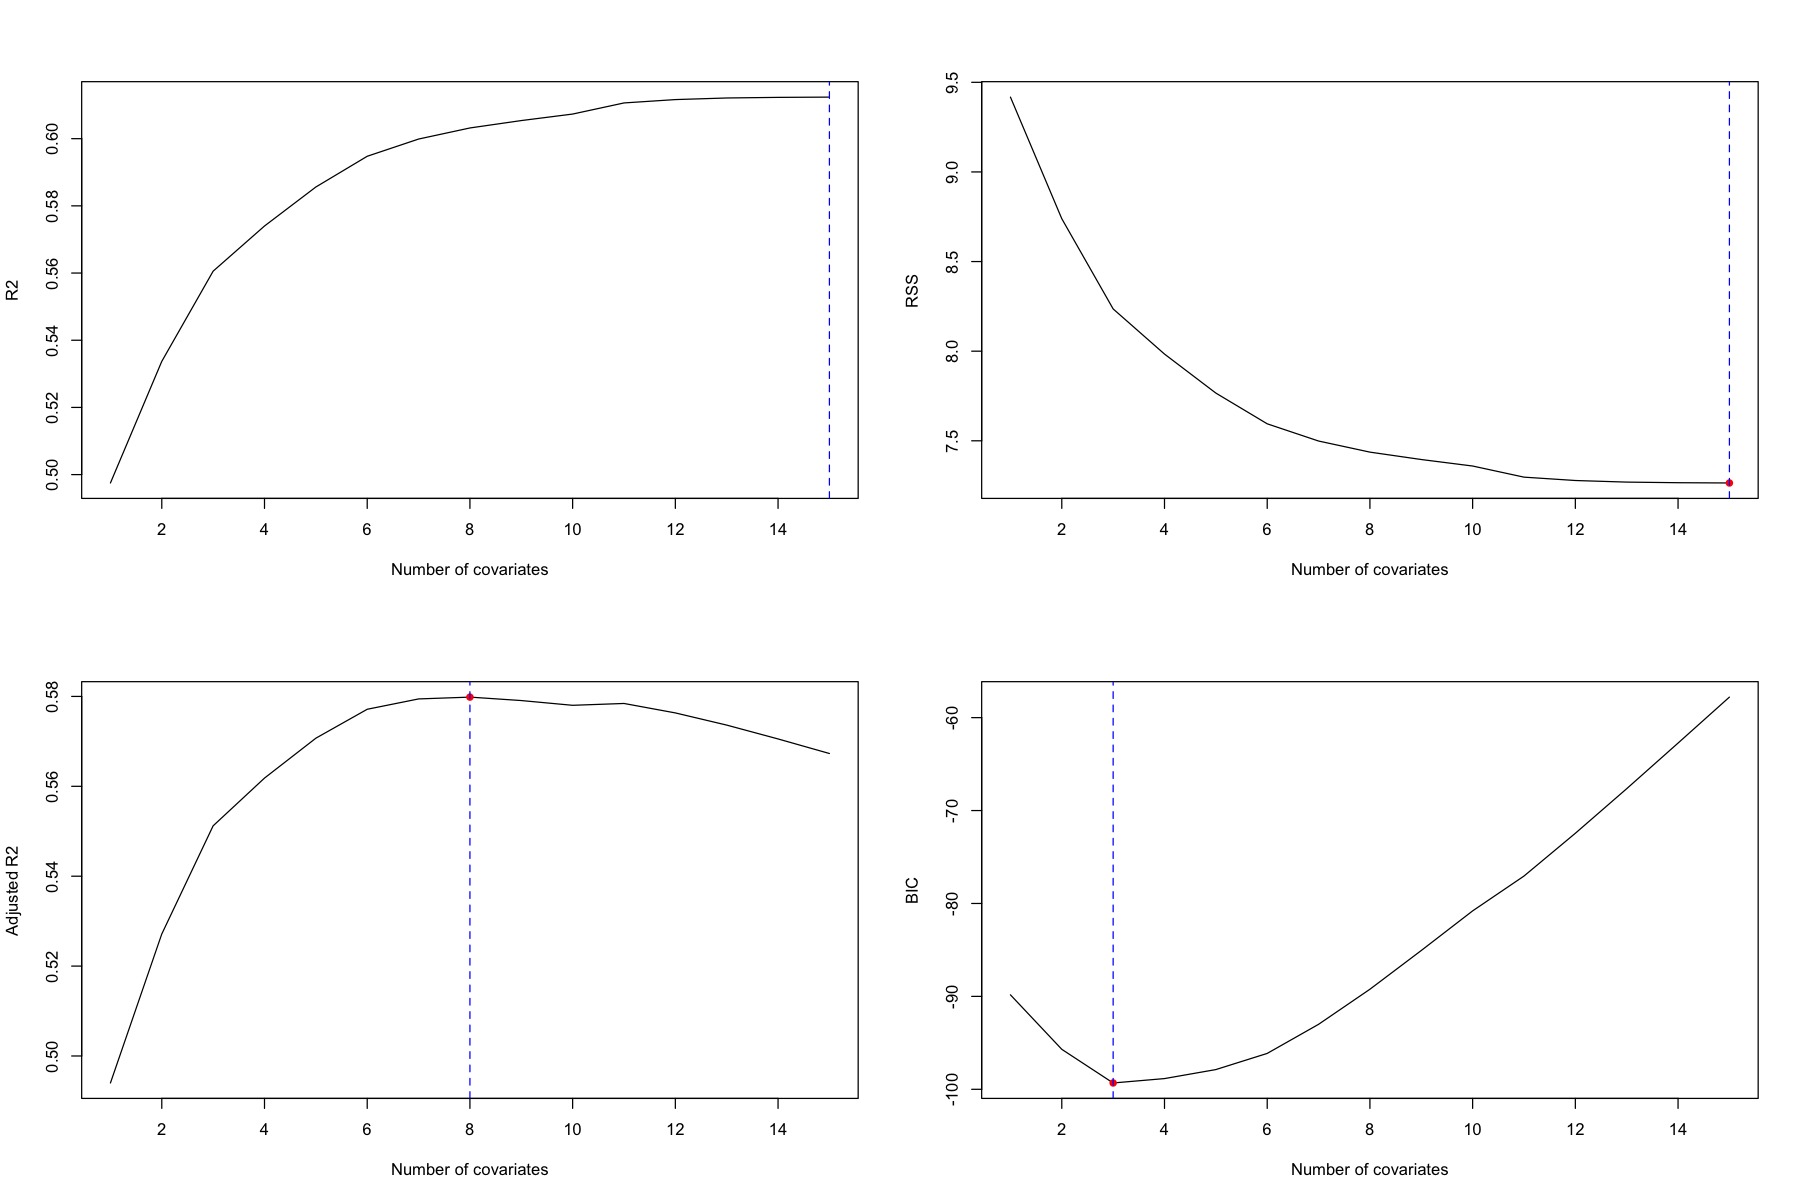

In [190]:
par(mfrow=c(2,2))
## R2
plot(summary(m.forward)$rsq, xlab='Number of covariates', ylab='R2', type='l')
## add on the indication of the best model
max.rsq <- which.max(summary(m.forward)$rsq)
#points(max.rsq, summary(m.forward)$rsq[max.rsq], col='red', pch=16)
abline(v=max.rsq, col="blue",lty=2)


## RSS
plot(summary(m.forward)$rss, xlab='Number of covariates', ylab='RSS', type='l')
min.rss <- which.min(summary(m.forward)$rss)
points(min.rss, summary(m.forward)$rss[min.rss], col='red', pch=16)
abline(v=min.rss, col="blue",lty=2)


## Adjusted R2
plot(summary(m.forward)$adjr2, xlab='Number of covariates',
ylab='Adjusted R2', type='l')
max.adjr2 <- which.max(summary(m.forward)$adjr2)
points(max.adjr2, summary(m.forward)$adjr2[max.adjr2], col='red', pch=16)
abline(v=max.adjr2, col="blue",lty=2)


## BIC
plot(summary(m.forward)$bic, xlab='Number of covariates', ylab='BIC', type='l')
min.bic <- which.min(summary(m.forward)$bic)
points(min.bic, summary(m.forward)$bic[min.bic], col='red', pch=16)
abline(v=min.bic, col="blue",lty=2)


paste0("the number of covariates for the best model base on BIC and AdjR2 are:", " ", max.adjr2, " ", "for adjr2 and ", min.bic, " for BIC") 

base on BIC we keep the model with the lowest BIC so with a number of covariates equal to : 3


Call:
lm(formula = felice ~ vita + reddito.distr + pilc, data = mydata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.17215 -0.09198  0.03834  0.13249  0.63759 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -5.046e-01  1.736e-01  -2.907 0.004241 ** 
vita           1.907e-02  2.234e-03   8.537 1.98e-14 ***
reddito.distr  1.016e+00  2.640e-01   3.849 0.000179 ***
pilc           1.065e-05  3.629e-06   2.935 0.003893 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2417 on 141 degrees of freedom
Multiple R-squared:  0.5606,	Adjusted R-squared:  0.5512 
F-statistic: 59.95 on 3 and 141 DF,  p-value: < 2.2e-16


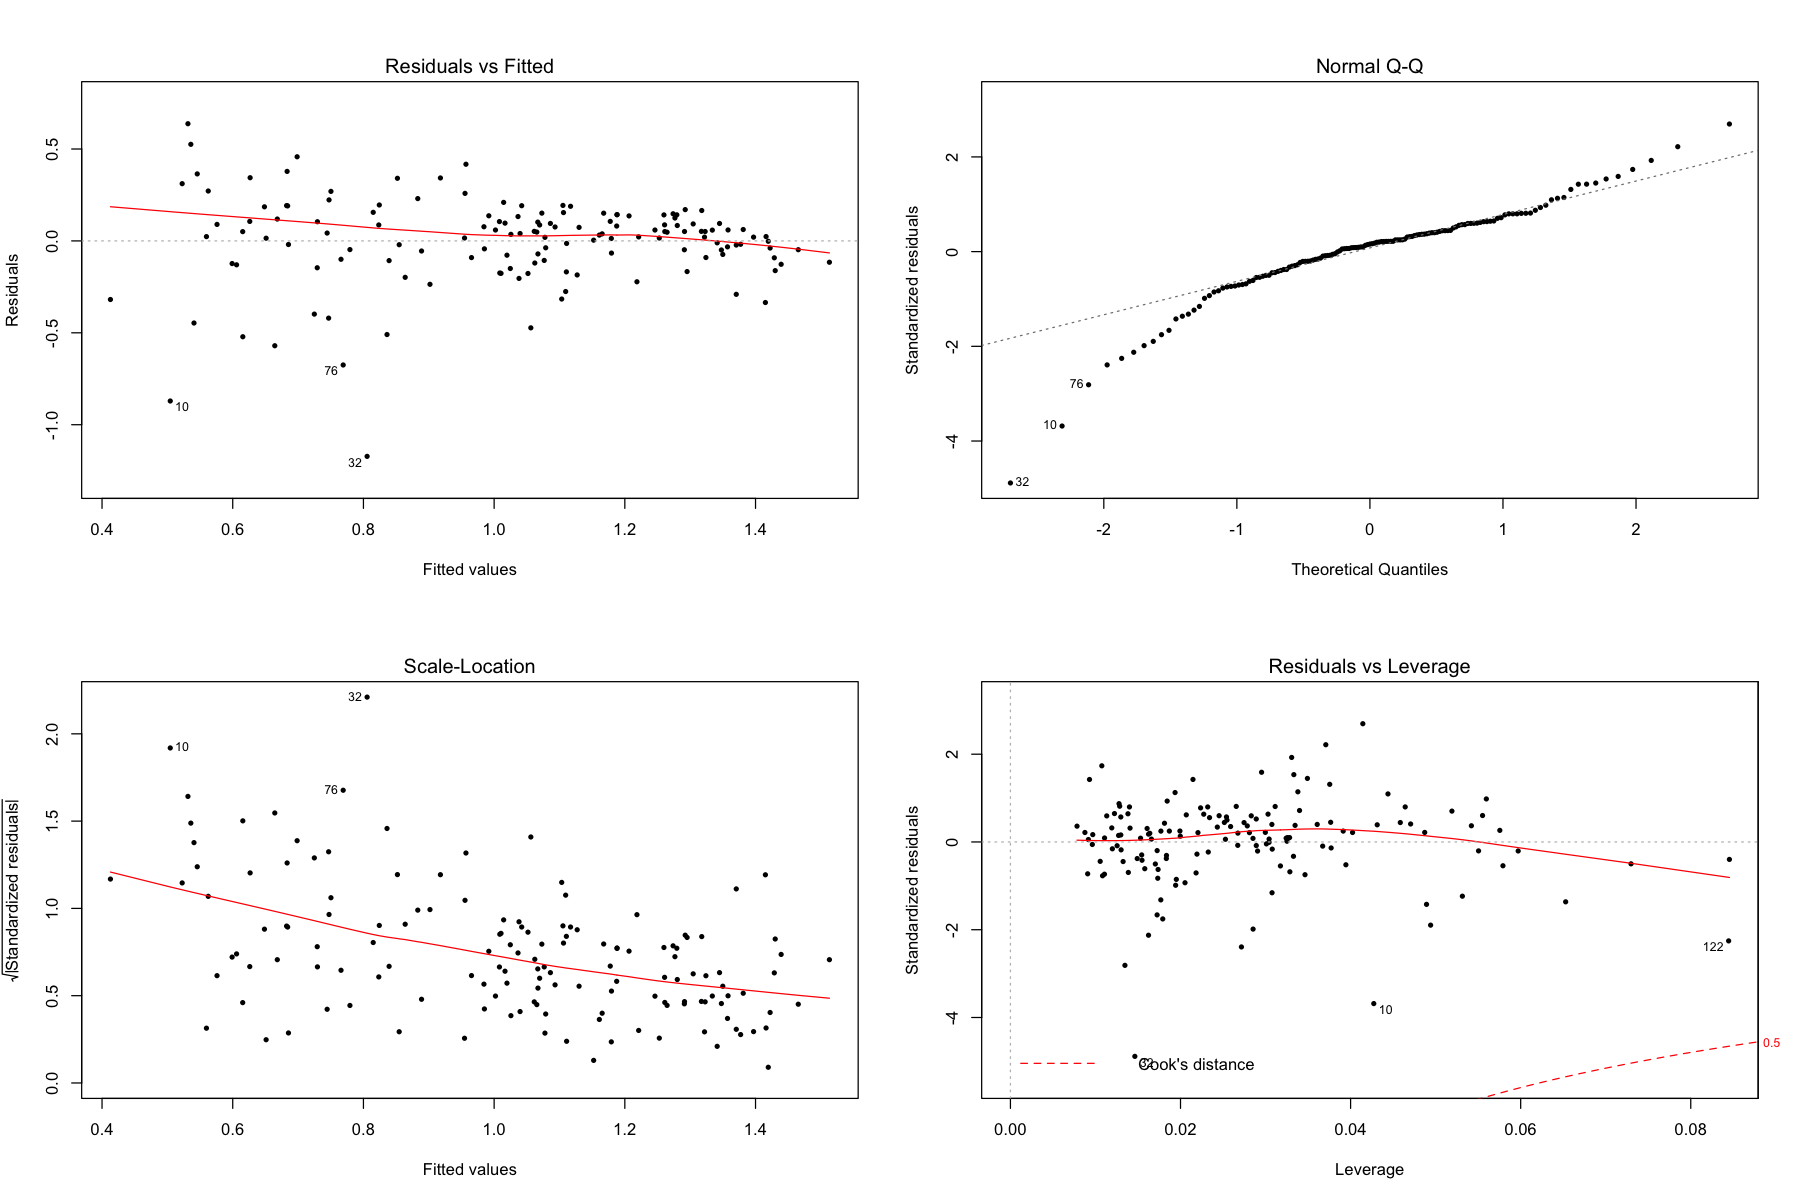

In [191]:
model.bic <- lm(felice ~ vita+reddito.distr+pilc, data=mydata)
summary(model.bic)
par(mfrow=c(2,2))
plot(model.bic, pch=16, cex=0.7)

Now we can judge also our model considering the residuals. 
The graph of residuals indicates that the model does not  have a good fit. In fact, the first graph (scatter plot of the residuals) doesn't show a deterministic pattern e. In addition, the mean of the residuals does not appear to be 0 and the variance of the residuals does  appear to be constant, as it should be based on the assumptions that the regression model places on the ε errors. Furthermore, the normality of the residuals is not satisfied  as highlighted in the second graph: the empirical quantiles in the tails , in fact,  deviate from the theoretical quantiles of a standard normal.
To complete the analysis of the residuals, no outliers appear to be present: although R highlights observations, these do not represent outlier observations since Cook's distance is not large. 

We also have that the MSE is:0.24

In [192]:
## FORWARD MSE
m.glm <- lm(felice ~ vita+reddito.distr+pilc, data=mydata)
p.mglm=predict(m.glm,newdata=mydata)
rmse <- sqrt(mean((mydata$felice - p.mglm)^2))
rmse 

[1] 0.2383246

### BACKWORD SELECTION

Reordering variables and trying again:


(Intercept) salute.indice          vita reddito.distr  spese.pagate 
-1.167467e-01 -1.129993e-02  2.305889e-02  8.858992e-01  2.180099e-03 
         pilc         banca    democrazia     I(pilc^2)    s(pilc, 9) 
 4.850785e-05 -5.467890e-02  5.235495e-02 -1.224286e-09  0.000000e+00

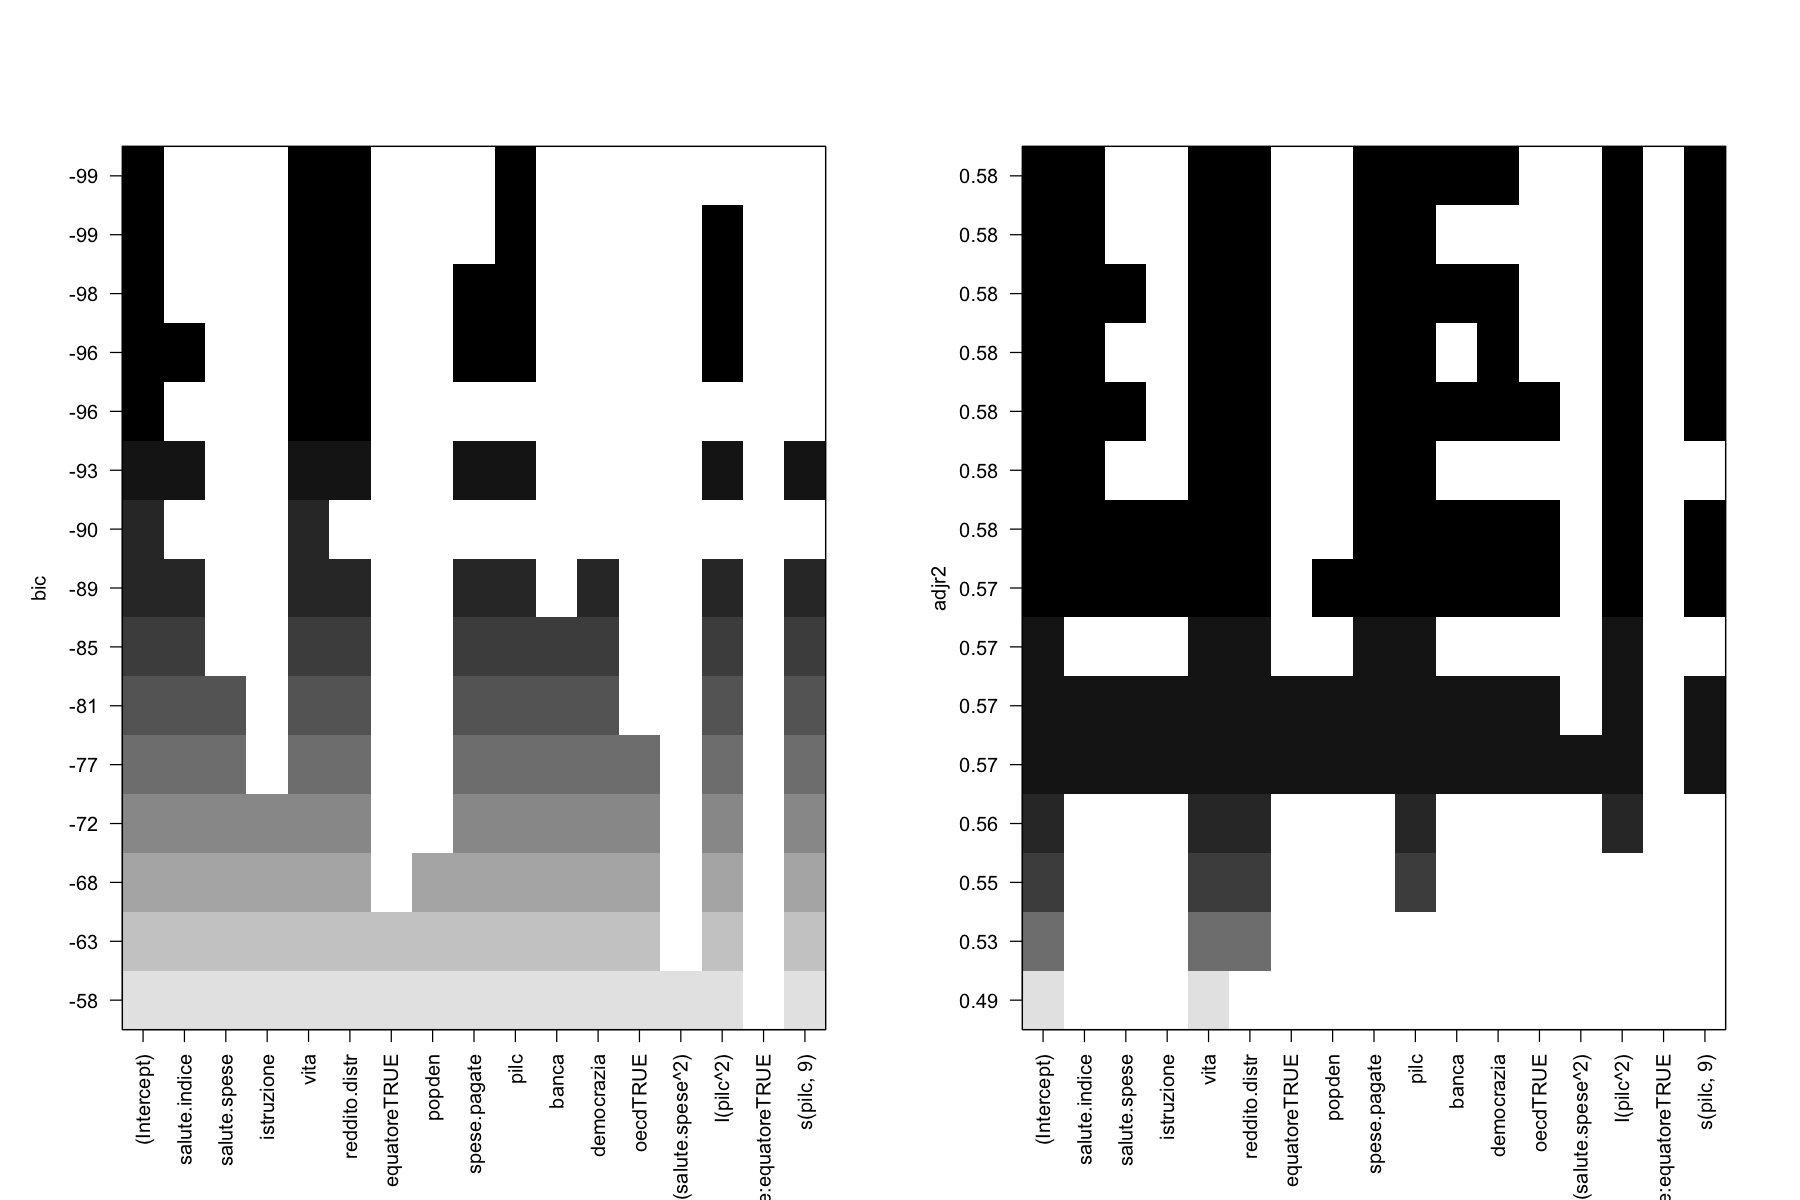

[1] "the number of covariates for the best model base on BIC and AdjR2 are: 9 for adjr2 and 3 for BIC"

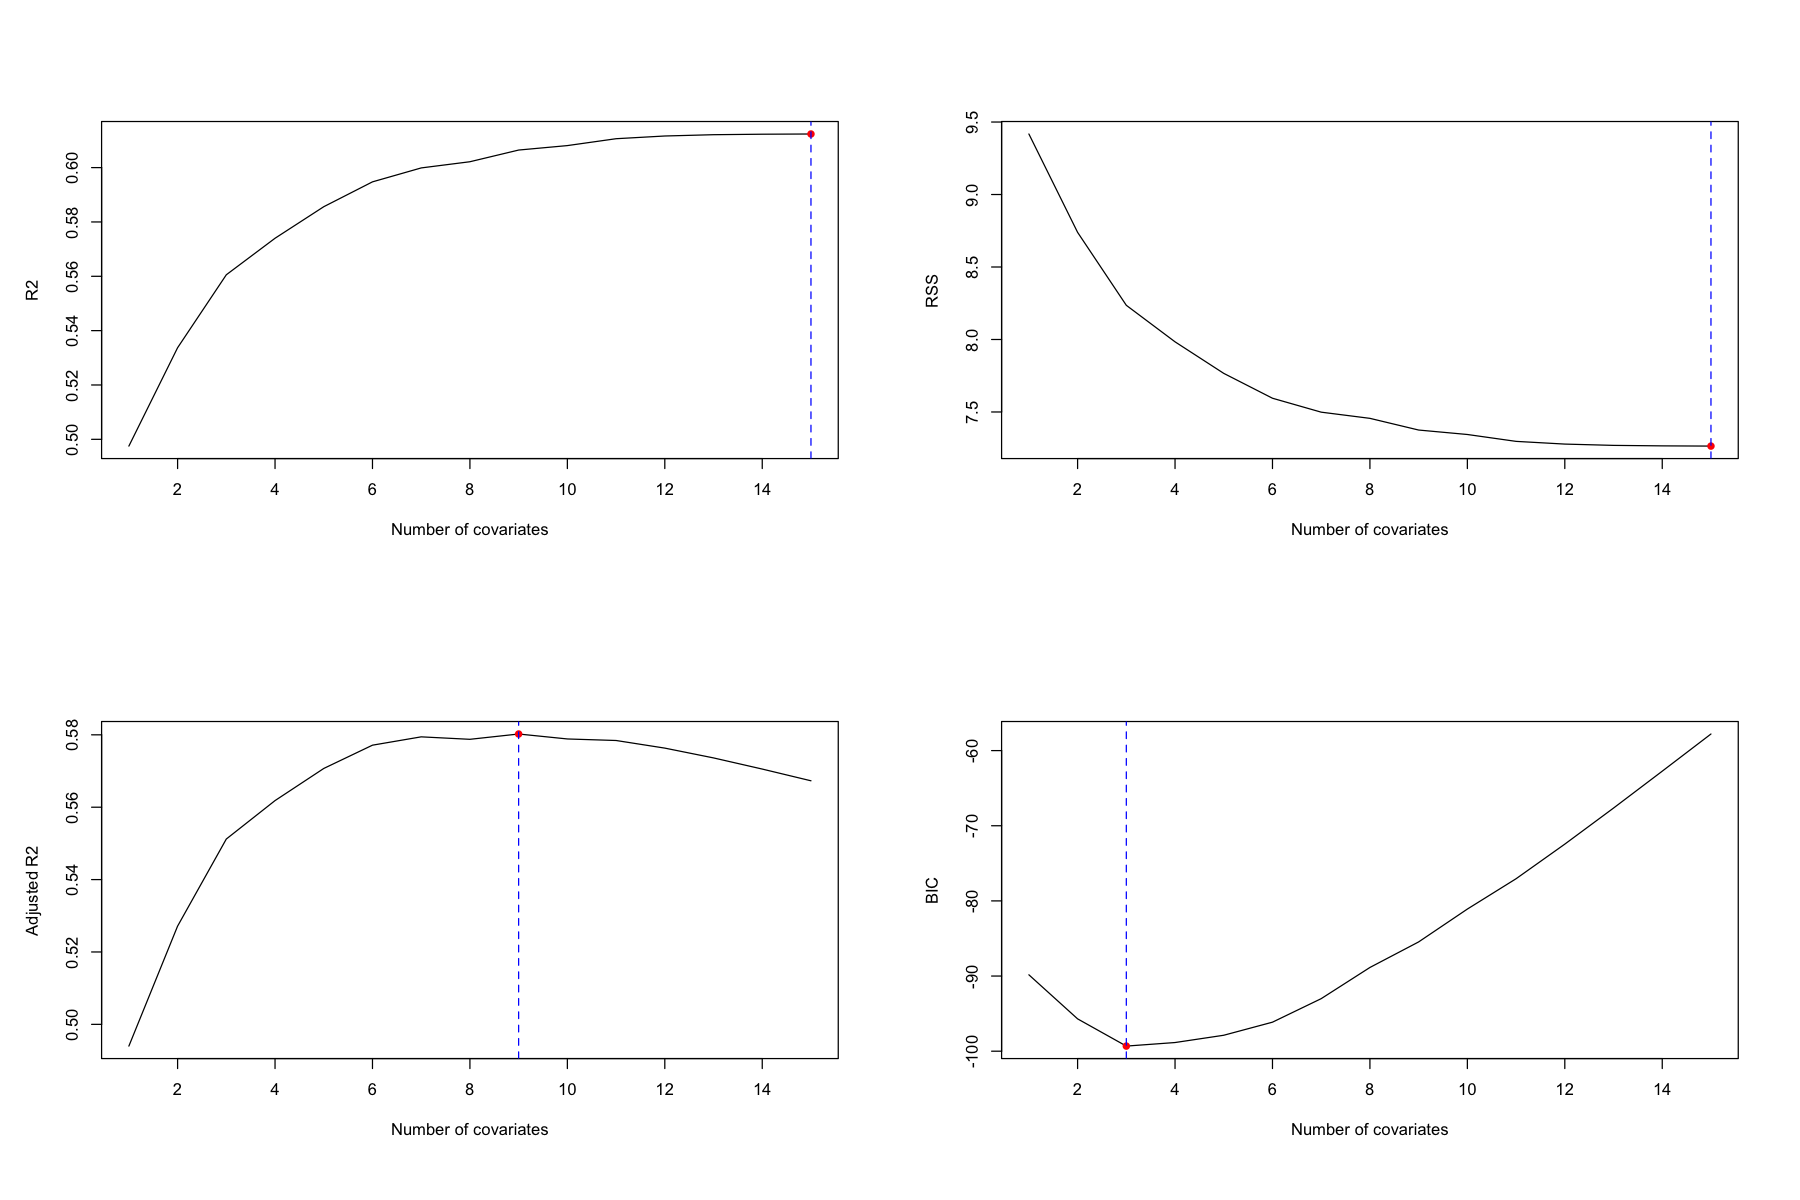

In [197]:
m.backward <- regsubsets(felice ~ .+I(salute.spese^2)+I(pilc^2)+salute.spese:equatore+s(pilc,9), data=mydata, nvmax=17, method='backward')
#plot(m.backward)

coef(m.backward,9 )

par(mfrow=c(1,2))
options(repr.plot.width = 15, repr.plot.height = 10)
plot(m.backward)
plot(m.backward, scale='adjr2')
par(mfrow=c(2,2))
## R2
plot(summary(m.backward)$rsq, xlab='Number of covariates', ylab='R2', type='l')
## add on the indication of the best model
max.rsq <- which.max(summary(m.backward)$rsq)
points(max.rsq, summary(m.backward)$rsq[max.rsq], col='red', pch=16)
abline(v=max.rsq, col="blue",lty=2)


## RSS
plot(summary(m.backward)$rss, xlab='Number of covariates', ylab='RSS', type='l')
min.rss <- which.min(summary(m.backward)$rss)
points(min.rss, summary(m.backward)$rss[min.rss], col='red', pch=16)
abline(v=min.rss, col="blue",lty=2)


## Adjusted R2
plot(summary(m.backward)$adjr2, xlab='Number of covariates',
ylab='Adjusted R2', type='l')
max.adjr2 <- which.max(summary(m.backward)$adjr2)
points(max.adjr2, summary(m.backward)$adjr2[max.adjr2], col='red', pch=16)
abline(v=max.adjr2, col="blue",lty=2)


## BIC
plot(summary(m.backward)$bic, xlab='Number of covariates', ylab='BIC', type='l')
min.bic <- which.min(summary(m.backward)$bic)
points(min.bic, summary(m.backward)$bic[min.bic], col='red', pch=16)
abline(v=min.bic, col="blue",lty=2)


paste0("the number of covariates for the best model base on BIC and AdjR2 are:", " ", max.adjr2, " ", "for adjr2 and ", min.bic, " for BIC") 

As you can see, forward and backward give us the same amount of covariates based on BIC. In fact in this case we have 9 covariates

### MIXED SELECTION

Reordering variables and trying again:


(Intercept)             salute.indice              salute.spese 
            -7.330442e-02             -1.073599e-02              1.240114e-04 
                     vita             reddito.distr              spese.pagate 
             2.219554e-02              6.847251e-01              2.811344e-03 
                 oecdTRUE                 I(pilc^2) salute.spese:equatoreTRUE 
            -7.078855e-02             -1.398496e-09              2.974808e-04 
               s(pilc, 9) 
             4.449205e-05

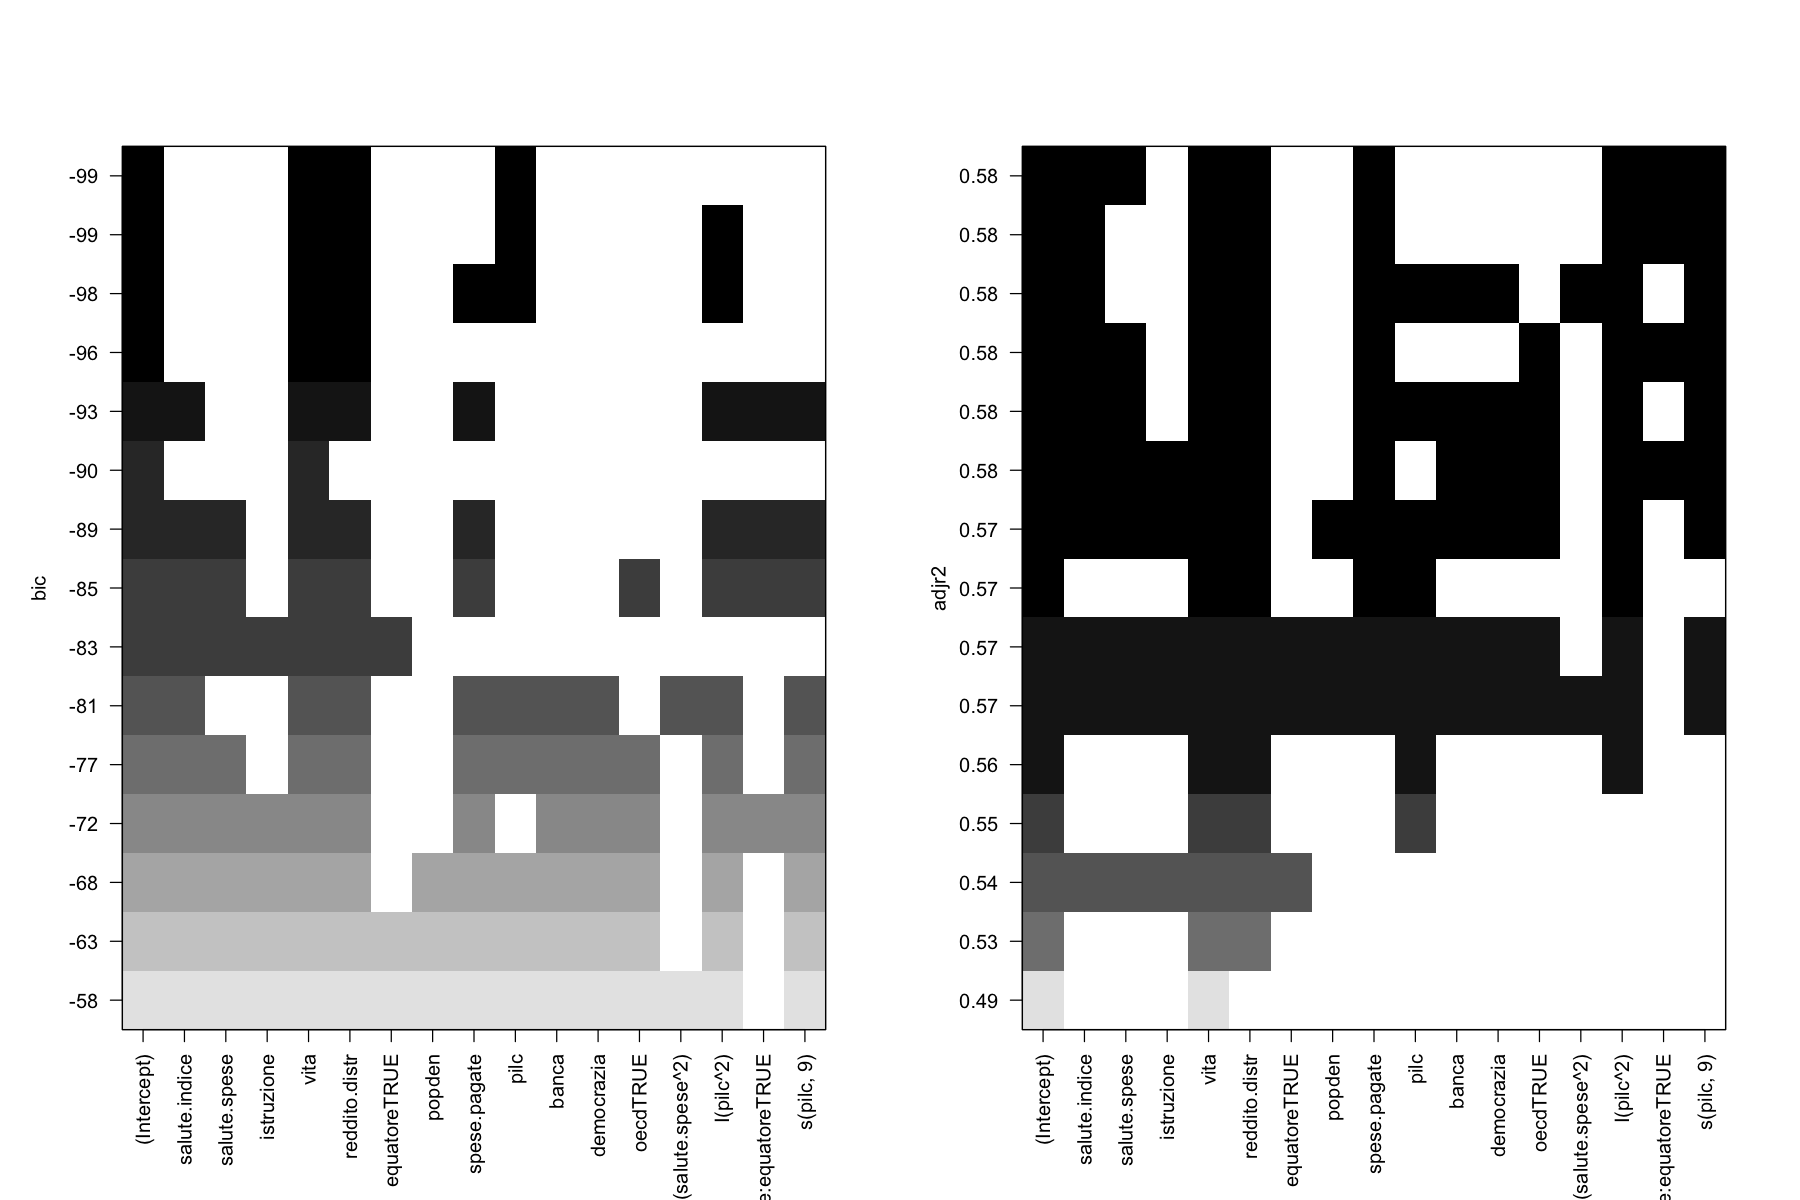

[1] "the number of covariates for the best model base on BIC and AdjR2 are: 8 for adjr2 and 3 for BIC"

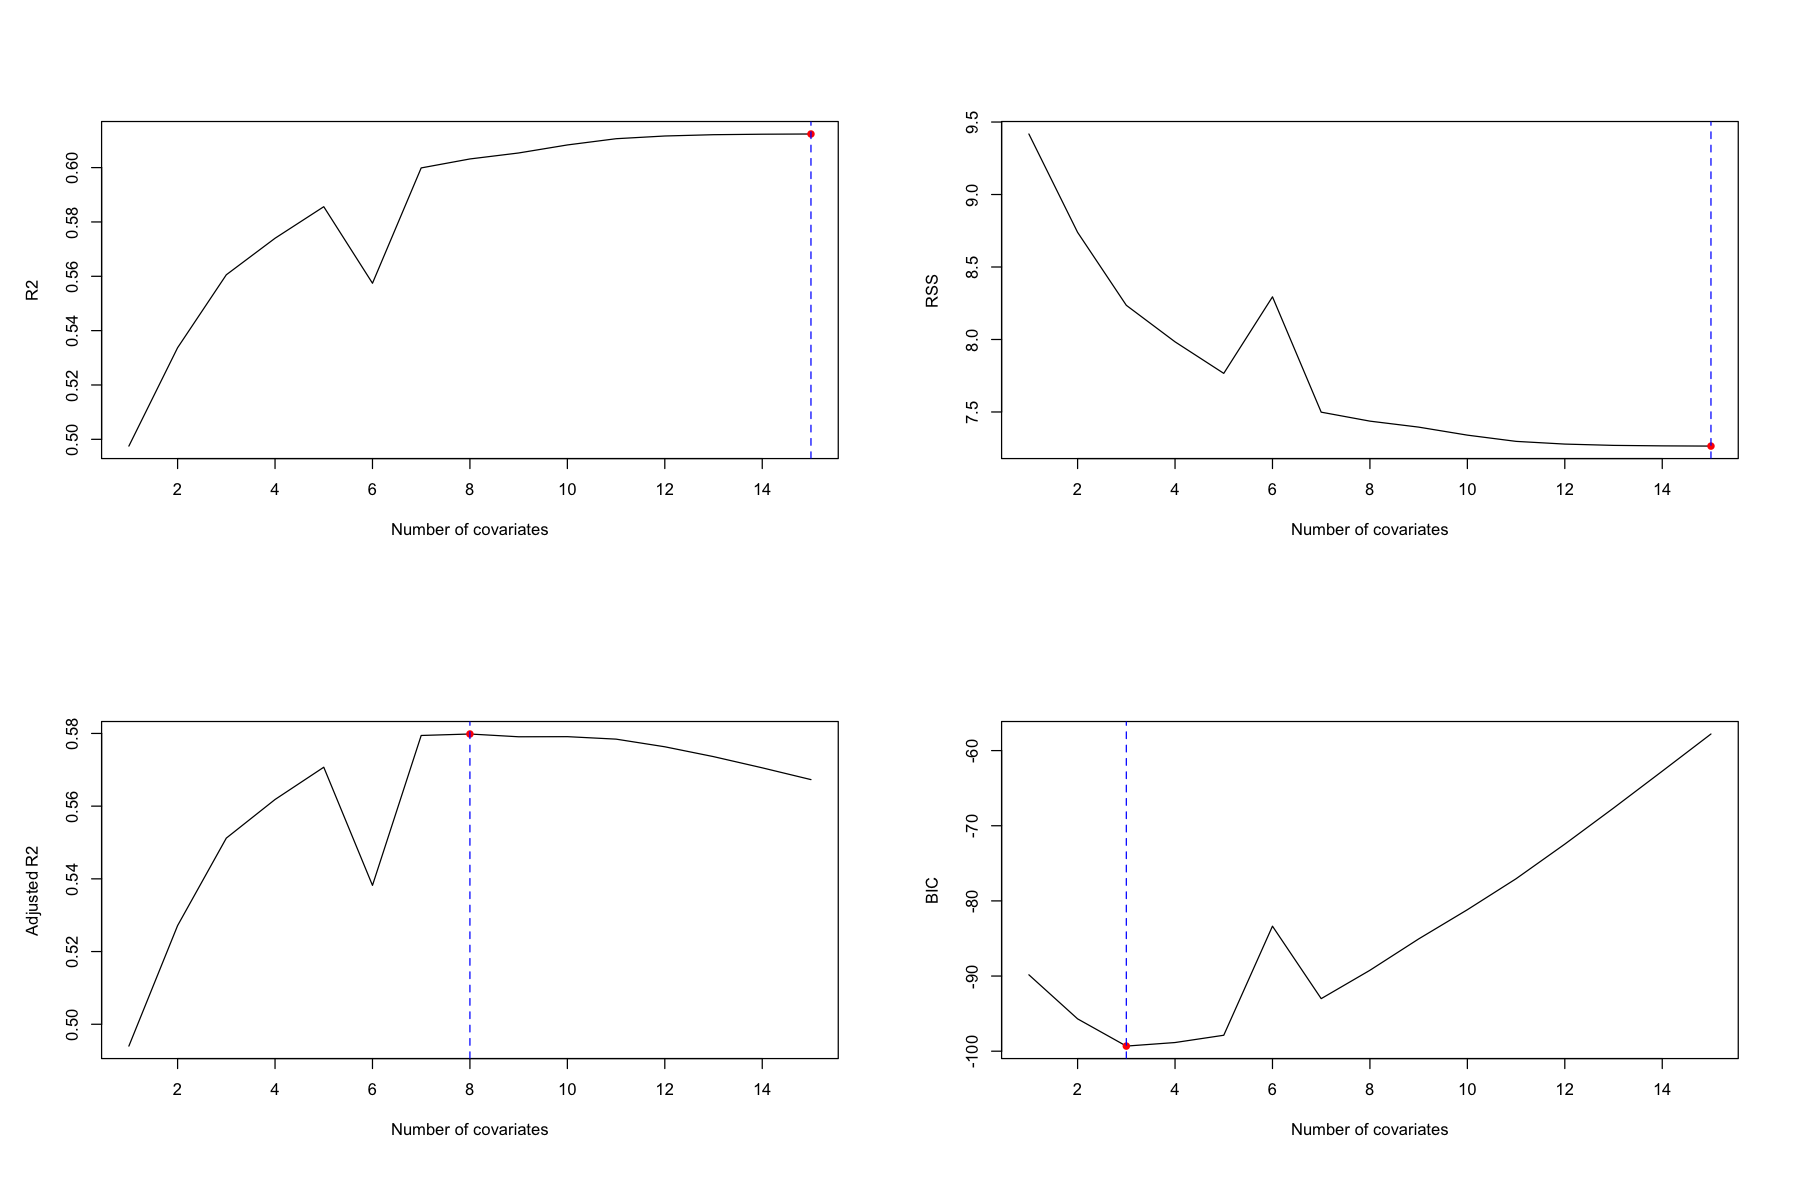

In [198]:
m.seqrep <- regsubsets(felice ~ .+I(salute.spese^2)+I(pilc^2)+salute.spese:equatore+s(pilc,9), data=mydata, nvmax=17, method='seqrep')

coef(m.seqrep,9 )

par(mfrow=c(1,2))
options(repr.plot.width = 15, repr.plot.height = 10)
plot(m.seqrep)
plot(m.seqrep, scale='adjr2')

par(mfrow=c(2,2))
## R2
plot(summary(m.seqrep)$rsq, xlab='Number of covariates', ylab='R2', type='l')
## add on the indication of the best model
max.rsq <- which.max(summary(m.seqrep)$rsq)
points(max.rsq, summary(m.seqrep)$rsq[max.rsq], col='red', pch=16)
abline(v=max.rsq, col="blue",lty=2)


## RSS
plot(summary(m.seqrep)$rss, xlab='Number of covariates', ylab='RSS', type='l')
min.rss <- which.min(summary(m.seqrep)$rss)
points(min.rss, summary(m.seqrep)$rss[min.rss], col='red', pch=16)
abline(v=min.rss, col="blue",lty=2)


## Adjusted R2
plot(summary(m.seqrep)$adjr2, xlab='Number of covariates',
ylab='Adjusted R2', type='l')
max.adjr2 <- which.max(summary(m.seqrep)$adjr2)
points(max.adjr2, summary(m.seqrep)$adjr2[max.adjr2], col='red', pch=16)
abline(v=max.adjr2, col="blue",lty=2)


## BIC
plot(summary(m.seqrep)$bic, xlab='Number of covariates', ylab='BIC', type='l')
min.bic <- which.min(summary(m.seqrep)$bic)
points(min.bic, summary(m.seqrep)$bic[min.bic], col='red', pch=16)
abline(v=min.bic, col="blue",lty=2)


paste0("the number of covariates for the best model base on BIC and AdjR2 are:", " ", max.adjr2, " ", "for adjr2 and ", min.bic, " for BIC") 


As we can see,  in this case we have 9 covariates again based on BIC.

### PRINCIPAL COMPONENT ANALYSIS
Let's consider Principal component analysis in order to see if it is useful.
I set the seed at 222.

In [199]:
## PCA
library(pls)
set.seed(222)
m.pcr <- pcr(felice ~ .+I(salute.spese^2)+I(pilc^2)+salute.spese:equatore+s(pilc,9), scale=TRUE, validation='CV', data=mydata)
summary(m.pcr)


Attaching package: ‘pls’

The following object is masked from ‘package:stats’:

    loadings



Data: 	X dimension: 145 16 
	Y dimension: 145 1
Fit method: svdpc
Number of components considered: 16

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           0.362   0.2902   0.2919   0.2612   0.2609   0.2611   0.2605
adjCV        0.362   0.2899   0.2916   0.2603   0.2604   0.2601   0.2621
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV      0.2517   0.2535   0.2534    0.2547    0.2573    0.2582    0.2567
adjCV   0.2509   0.2527   0.2526    0.2538    0.2561    0.2570    0.2553
       14 comps  15 comps  16 comps
CV       0.2477    0.2487    0.2499
adjCV    0.2464    0.2473    0.2425

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         55.55    66.95    74.78    81.95    85.74    89.24    92.47    94.77
felice    36.83    36.93    49.87    50.64    51.43    51.87    55.86    56.06
        9 comps  10 co

The output provides the result of the cross validation in terms of square root of the MSE for each number of PCs. -Choose the optimum through a graphical inspection of the results considering MSE and $R^{2}$.
We see that the  number of PCs needed is:  16
While the best number of components we can use for the analysis is : 3
We also have that the value of MSE is reported below.

In [203]:
MSEP(m.pcr, ncomp=selectNcomp(m.pcr, method='onesigma', ncomp=16))

       (Intercept)  3 comps
CV          0.1311  0.06820
adjCV       0.1311  0.06774

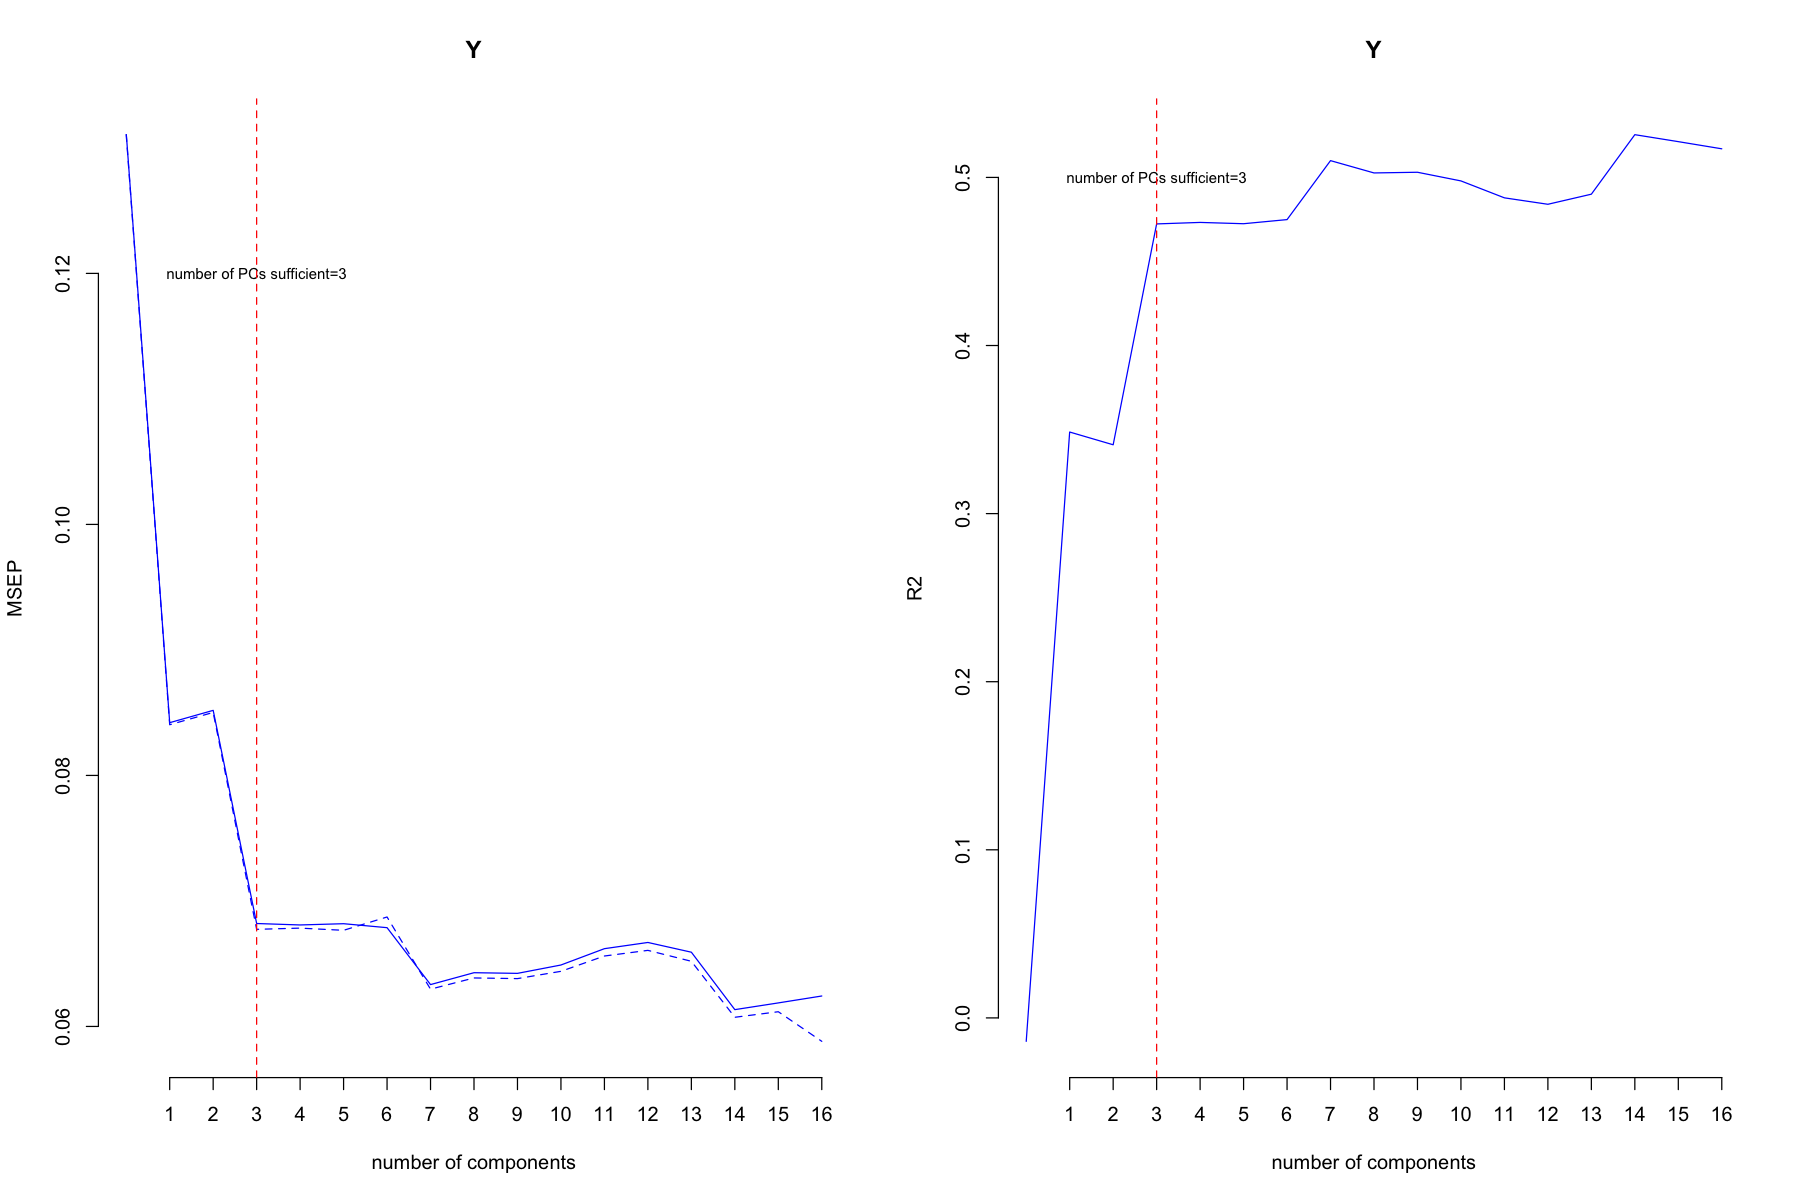

In [204]:
par(mfrow=c(1,2))
## graph without axes

validationplot(m.pcr, val.type='MSEP', main='Y', axes=FALSE, col="blue")
## add on the x-axis (1) with the specification (at) of the points at which tick-mar ## are to be drawn
axis(1, at=1:16)
## add on the y-axis
axis(2)
text(x=selectNcomp(m.pcr, method='onesigma', ncomp=12), y=0.12,cex=0.75,paste0("number of PCs sufficient=", selectNcomp(m.pcr, method='onesigma', ncomp=20)))
abline(v=selectNcomp(m.pcr, method='onesigma', ncomp=12), col="red",lt=2)

validationplot(m.pcr, val.type='R2', main='Y', axes=FALSE,col="blue")
axis(1, at=1:16)
axis(2)
text(x=selectNcomp(m.pcr, method='onesigma', ncomp=16), y=0.5,cex=0.75,paste0("number of PCs sufficient=", selectNcomp(m.pcr, method='onesigma', ncomp=20)))
abline(v=selectNcomp(m.pcr, method='onesigma', ncomp=16), col="red",lt=2)

Let's look how much variance is explained by the 12 components in the plot below.
While te explained variance for our 5 PCs obtained before is: 75%

Comp 1       Comp 2       Comp 3       Comp 4       Comp 5       Comp 6 
5.554650e+01 1.140698e+01 7.827924e+00 7.171652e+00 3.790394e+00 3.501419e+00 
      Comp 7       Comp 8       Comp 9      Comp 10      Comp 11      Comp 12 
3.226634e+00 2.302054e+00 1.759233e+00 1.225024e+00 9.325943e-01 8.012578e-01 
     Comp 13      Comp 14      Comp 15      Comp 16 
2.674417e-01 1.825939e-01 5.829613e-02 9.972090e-32

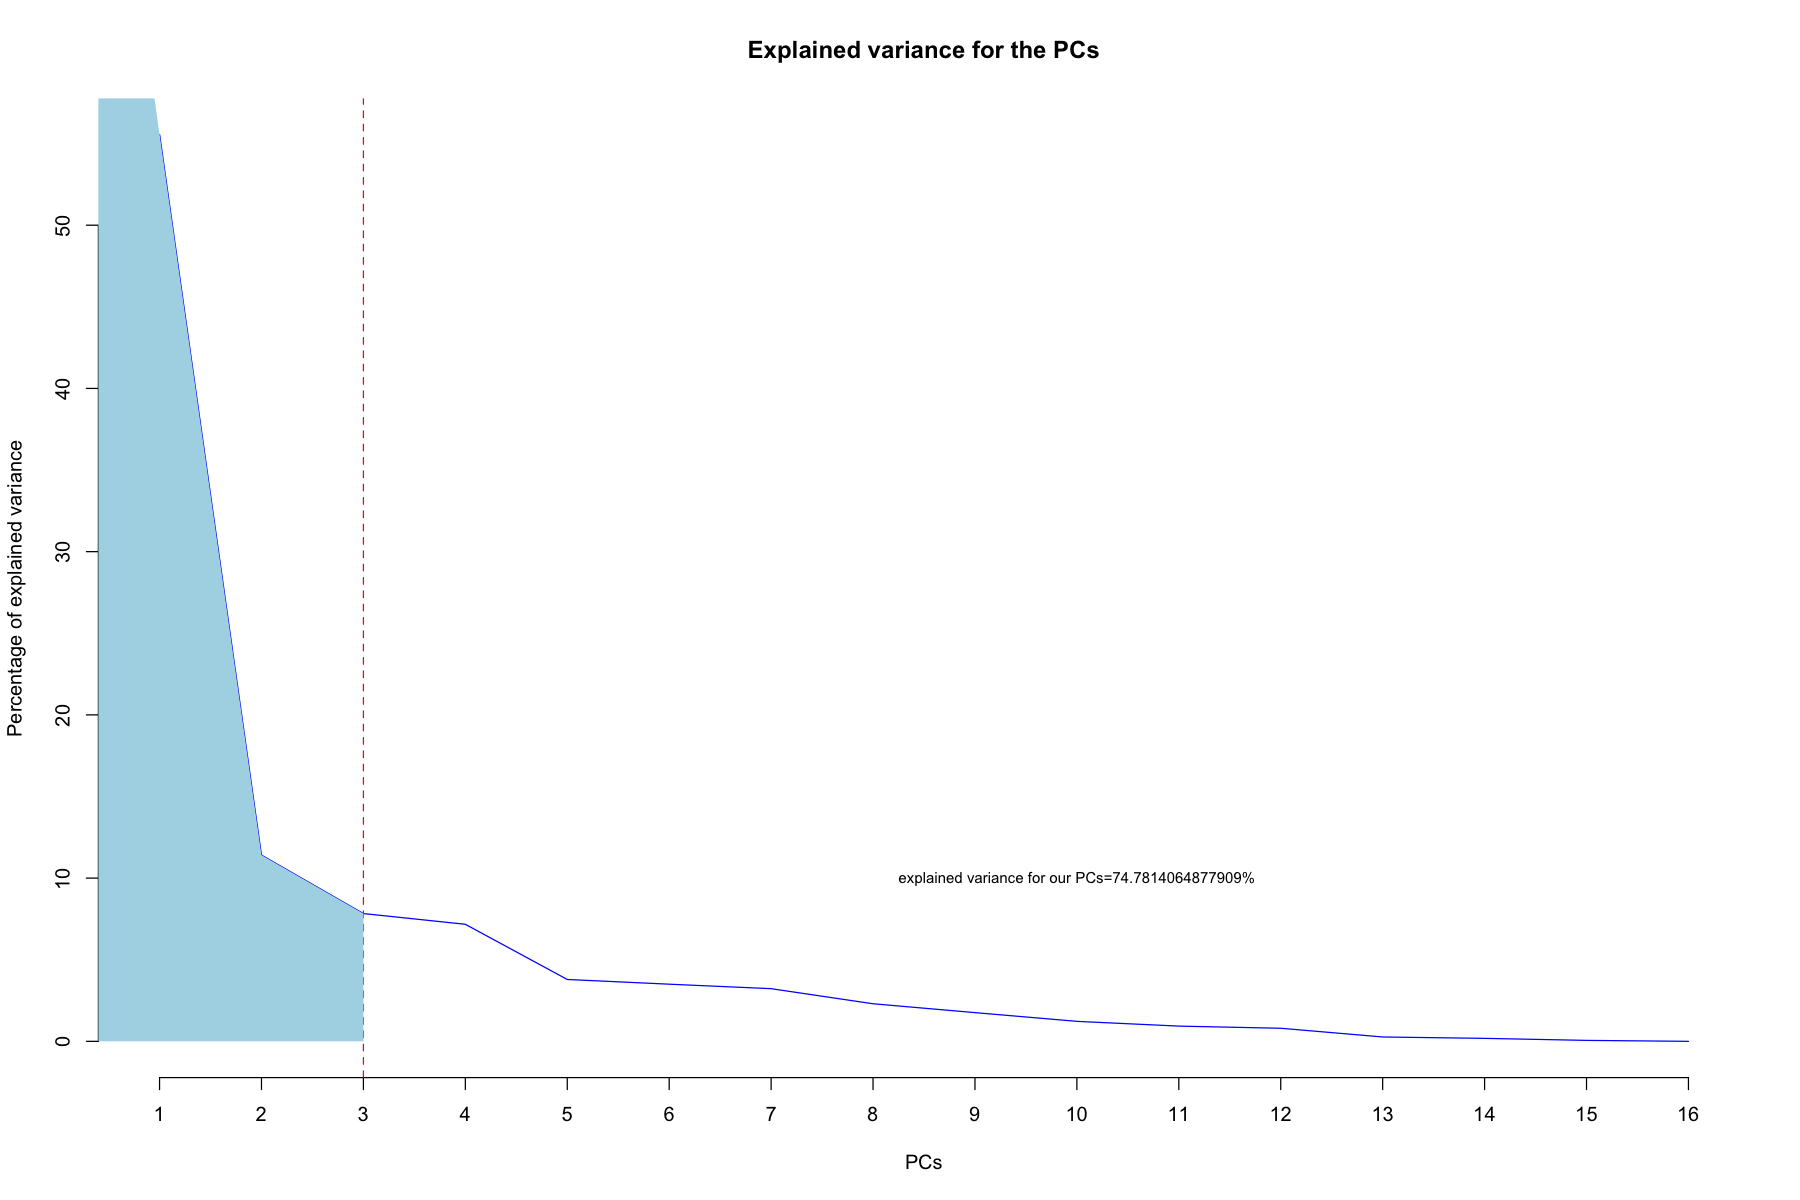

In [206]:
## explained variance
explvar(m.pcr)
sum=sum(explvar(m.pcr)[1:selectNcomp(m.pcr, method='onesigma', ncomp=12)])

## plot:

plot(1:16, explvar(m.pcr), ylab='Percentage of explained variance',
        xlab='PCs', type='l', axes=FALSE,col="blue",main="Explained variance for the PCs")
axis(1, at=1:16)
axis(2)
text(x=10, y=10,cex=0.75,paste0("explained variance for our PCs=",sum,"%"))
abline(v=selectNcomp(m.pcr, method='onesigma', ncomp=16), col="red",lt=2)



x2 = c(0,0,1:3,3)
y2 = c(0,100,explvar(m.pcr)[1:selectNcomp(m.pcr, method='onesigma', ncomp=16)],0)
polygon(x2,y2, col="lightblue", border=NA)

Let's now  plot Plot the regression coefficients associated to the models with increasing PCs, from 1 to 3
We see that we have our 5 models. We look for the picks. As picks are higher as our model is better (model 1 coefficients almost 0). The model with 3 comps give us the largest amount of informations (it is the better one).
In particular we see that the price is associated to stories,aircon and bedrooms.

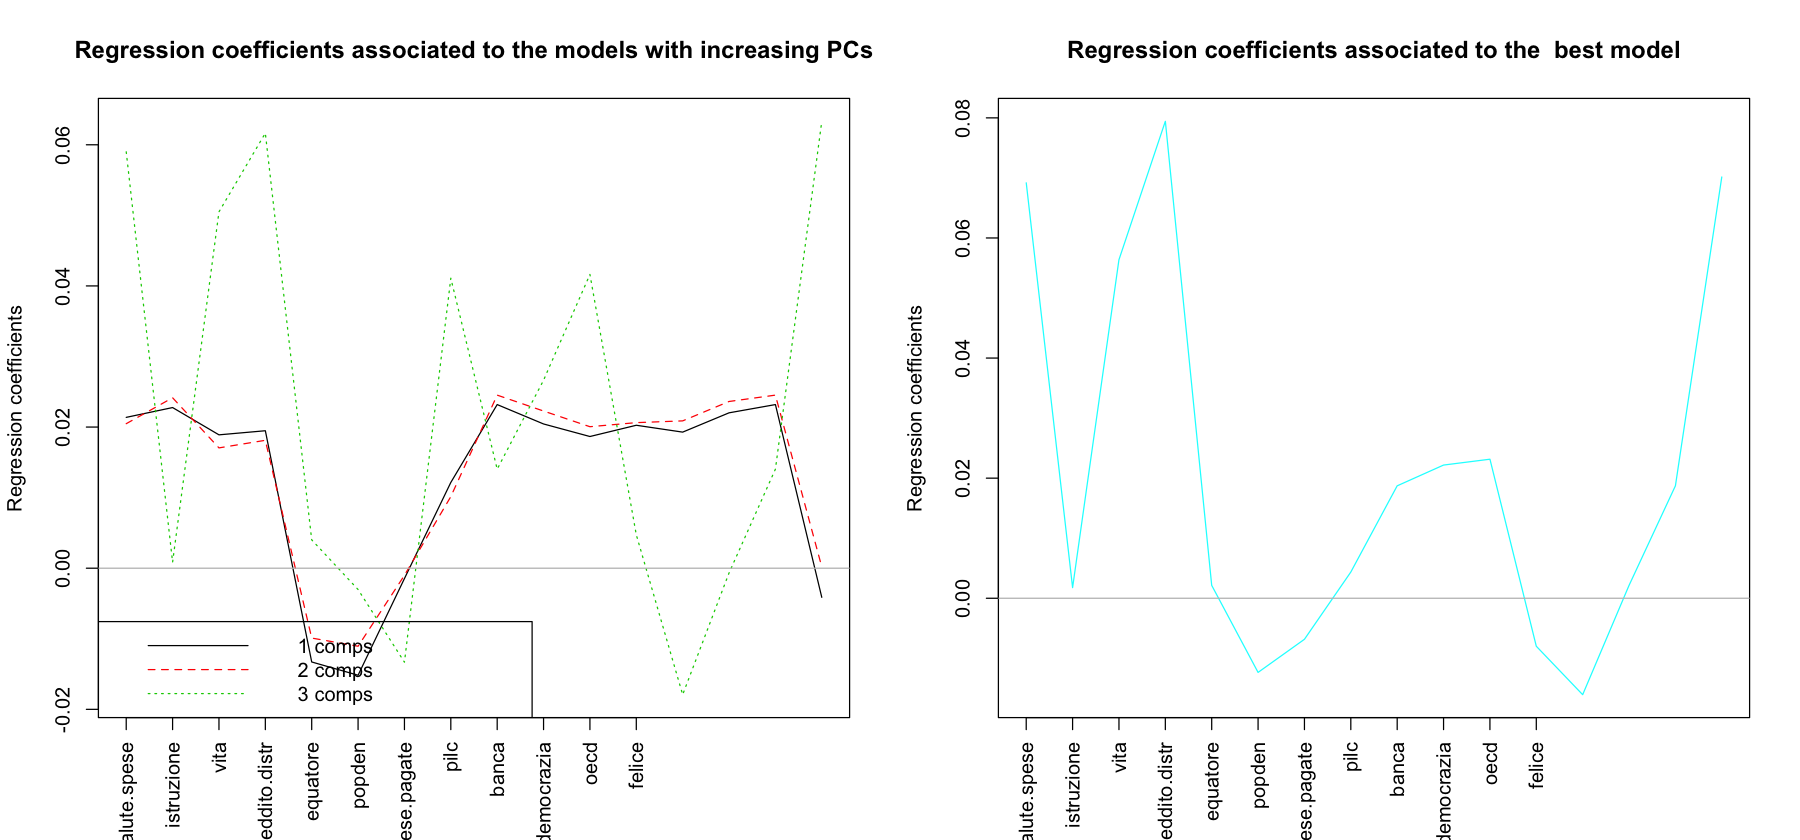

In [212]:
#plot

par(mfrow=c(1,2))
options(repr.plot.width = 15, repr.plot.height = 7)
coefplot(m.pcr, ncomp=1:selectNcomp(m.pcr, method='onesigma', ncomp=20), legendpos='bottomleft', main='',
        xlab='', ylab='Regression coefficients',xaxt="n")
axis(1, at=1:12, labels=colnames(mydata)[-1], las=2, cex=1, cex.axis=1)
title("Regression coefficients associated to the models with increasing PCs")

coefplot(m.pcr, ncomp=5, main='', xlab='',,xaxt="n", ylab='Regression coefficients',col="cyan")
title("Regression coefficients associated to the  best model")
axis(1, at=1:12, labels=colnames(mydata)[-1], las=2, cex=1, cex.axis=1)

Let's evaluate the presence of of groups of observations or outliers through the scores. We do  see a kind of trends (polynomial) in the groups. So even if the PCA has got a good explained deviance it could be improved.

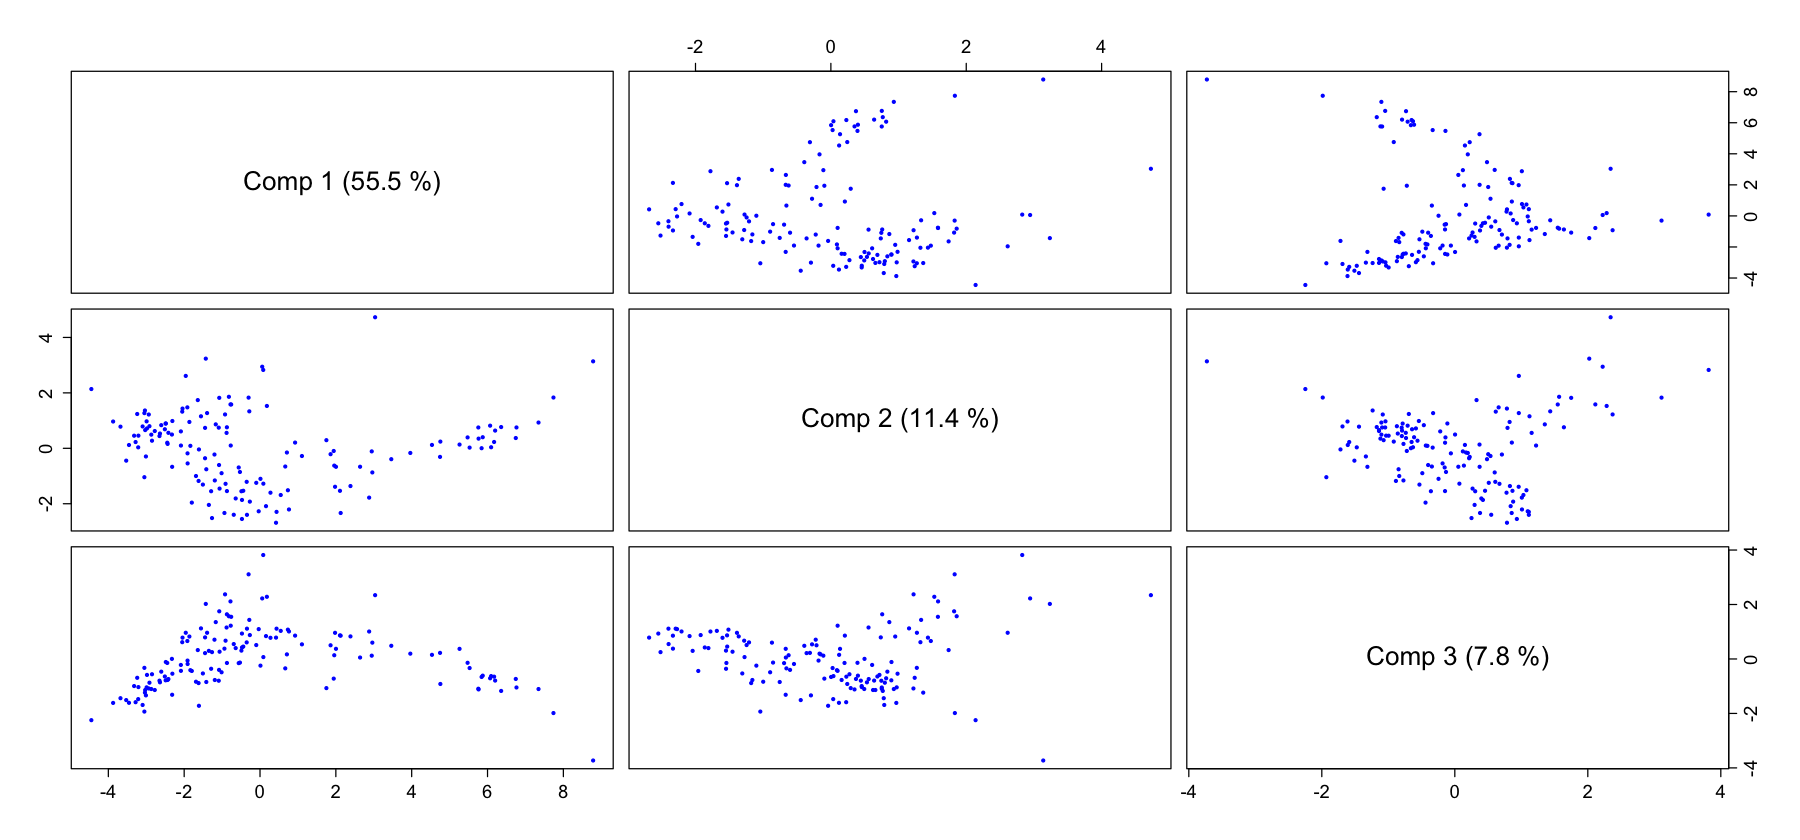

In [213]:
scoreplot(m.pcr, comps=1:selectNcomp(m.pcr, method='onesigma', ncomp=16), cex=0.5, cex.lab=1.4, cex.axis=1.4, pch=19,col="blue")


Finally, evaluate the predictions from the model.
Values around the bisector does suggest a good behavior of the model.

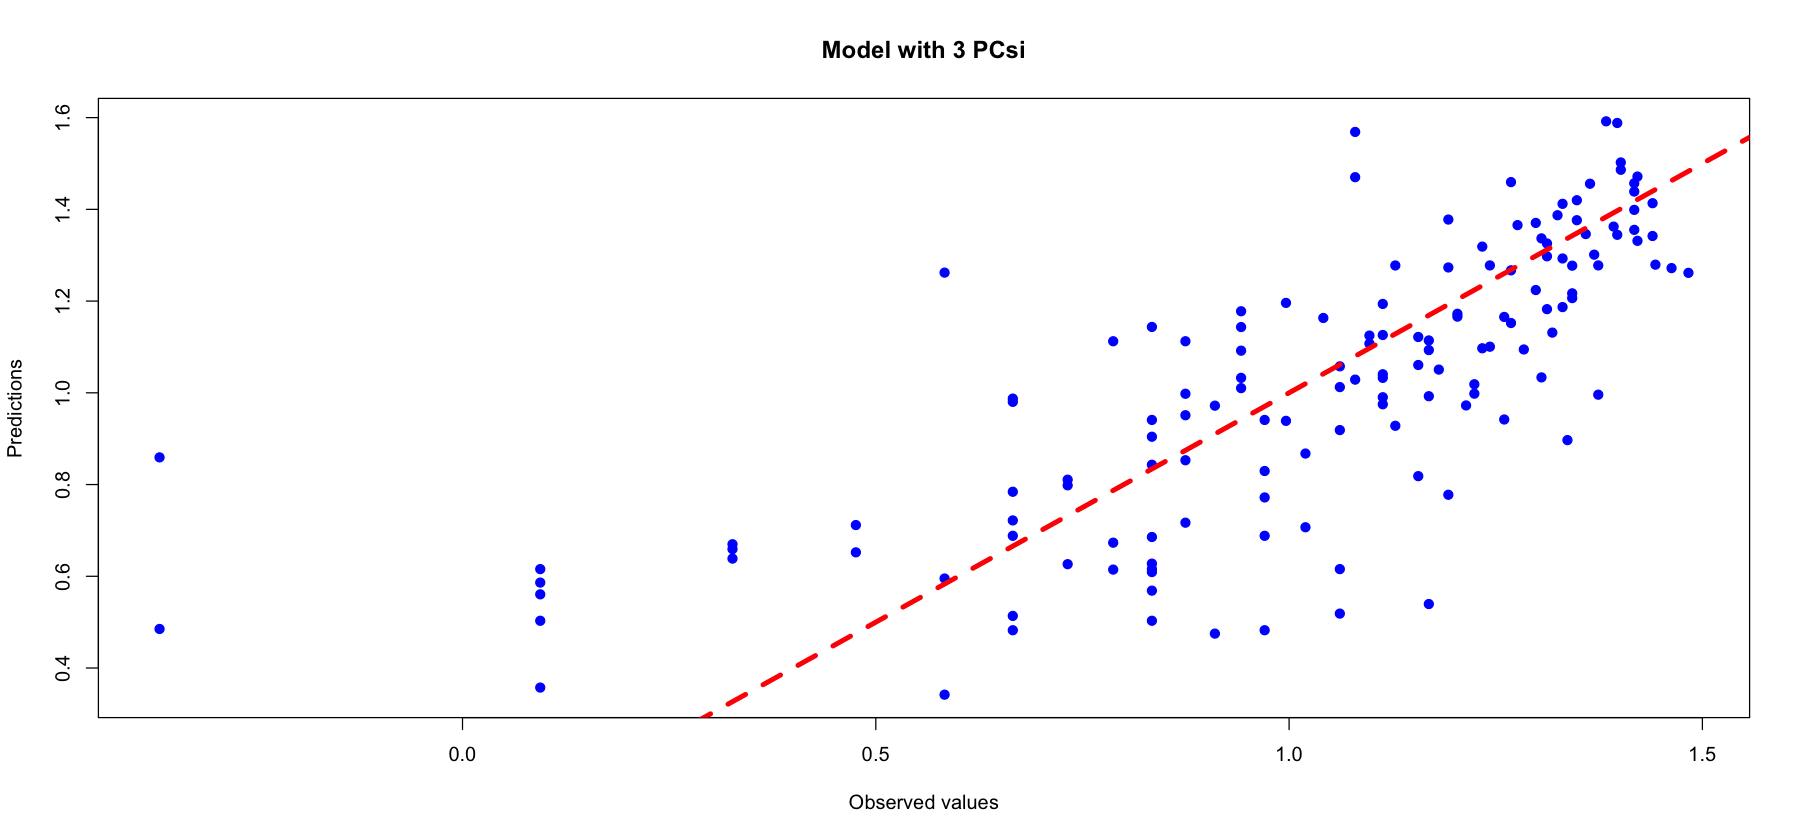

In [214]:
# plot predizione
plot(m.pcr, xlab='Observed values', ylab='Predictions',
        main='Model with 3 PCsi',col="blue",pch=19)
abline(0, 1, col="red",lt=2,lwd=4)